In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from env_config import DATA_PATH
from data import read_fits_to_pandas, merge_specialized_catalogs
from evaluation import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
sns.set(style='whitegrid')

In [42]:
def adjust_logan_to_report(data):
    data = data.copy(deep=True)
    
    # CLASS_PHOTO - final classification
    data['CLASS_PHOTO'] = data['Labelc']
    number_to_class_dict = {0: 'OUTLIER', 1: 'STAR', 2: 'GALAXY', 3: 'QSO'}
    data = data.replace({'CLASS_PHOTO': number_to_class_dict})
    
    # {CLASS}_PHOTO - classification probability
    for c in ['GALAXY', 'QSO', 'STAR']:
        data['{}_PHOTO'.format(c)] = 0
        data.loc[data['CLASS_PHOTO'] == c, '{}_PHOTO'.format(c)] = 1
    
    # Z_PHOTO
    data['Z_PHOTO'] = data['zPredQ']
    
    # column true
    data['CLASS'] = data['zClass14'].str.decode("utf-8").str.strip()
    
    # Z true
    data['Z'] = data['zSDSS14']
    
    return data

def adjust_nakoneczny_to_report(data):
    data = data.copy(deep=True)

    class_photo = data[['GALAXY_PHOTO', 'QSO_PHOTO', 'STAR_PHOTO']].idxmax(axis=1)
    data.loc[:, 'CLASS_PHOTO'] = class_photo.apply(lambda x: x.split('_')[0])

    data.loc[:, 'Z_PHOTO'] = data['QSO_Z_PHOTO']
    data.loc[:, 'Z_PHOTO_STDDEV'] = data['QSO_Z_PHOTO_STDDEV']

    data.loc[:, 'CLASS'] = data['zClass14'].str.decode('utf-8').str.strip()
    data.loc[:, 'Z'] = data['zSDSS14']
    
    return data

# Results from experiments with train/validation/test
- Logan & Fotopoulou 2020 data evaluated on validation/test sets trimmed at r < 21.3 (our random validation limit)

In [5]:
logan_data = read_fits_to_pandas(os.path.join(DATA_PATH, 'KiDS/DR4/Logan_2020_train.fits'))

31/08/2020 17:00:44 WARNING: VerifyWarning: Invalid keyword for column 18: ASCII table null option (TNULLn) is longer than the column's character width and will be truncated (got '-32768').


In [6]:
logan_data = adjust_logan_to_report(logan_data)

In [7]:
train_idx = logan_data['phztrain'].isin([1, 2, 3, 4, 5, 6])
validation_idx = logan_data['phztrain'].isin([7, 8])
test_idx = logan_data['phztrain'].isin([9, 10])
bright_idx = logan_data['rmag'] < 21.3
faint_idx = logan_data['rmag'] > 21.3

../evaluation.py:79: UserWarning: KiDS columns not added due to lack of KiDS ID column
  warnings.warn('KiDS columns not added due to lack of KiDS ID column')


Number of objects: 32779
Multiclass classification results:
Accuracy = 0.9653
F1 per class = [0.9771 0.     0.9131 0.9765]
Logloss = 0.9848


<Figure size 600x400 with 0 Axes>

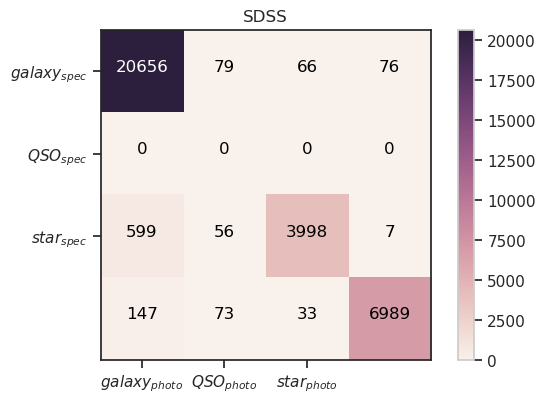

../plotting.py:239: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


<Figure size 600x400 with 0 Axes>

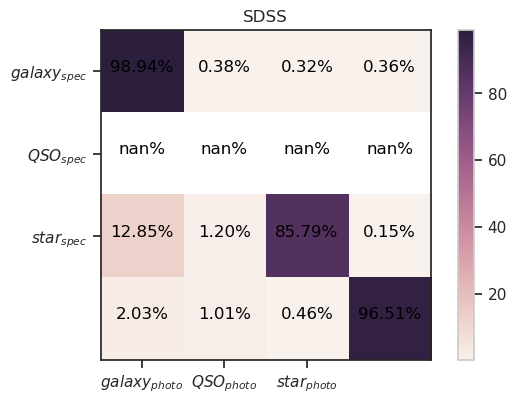

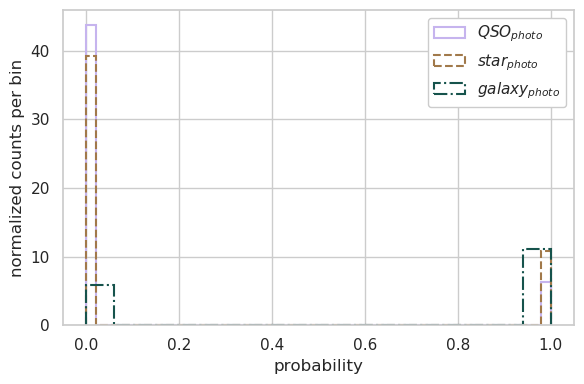

Binary classification results:
Predicted positives: 4097/32779 (12.50%)
Logloss = 0.8019
Accuracy = 0.9768
F1 = 0.9131
Precision = 0.9758
Recall = 0.8579
ROC AUC = 0.9272


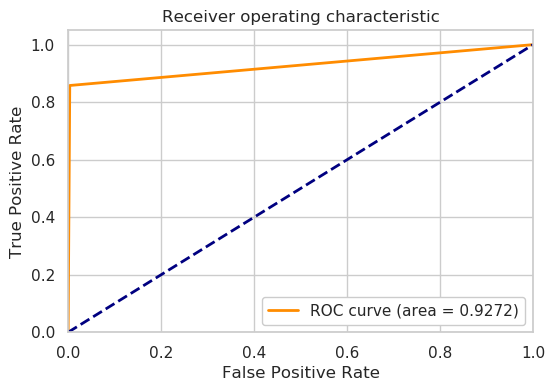

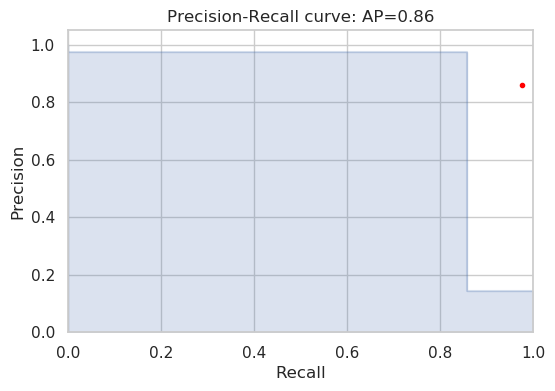

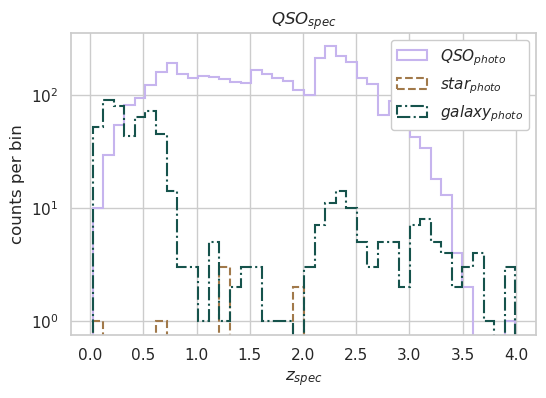

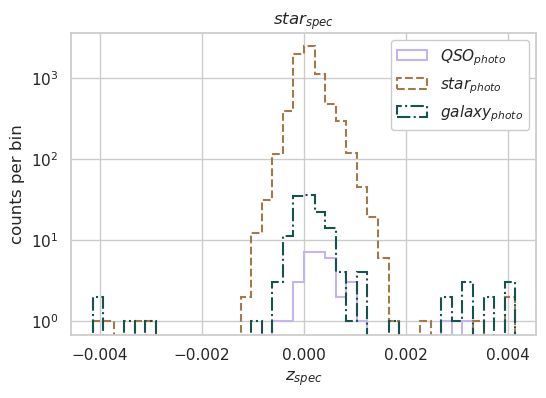

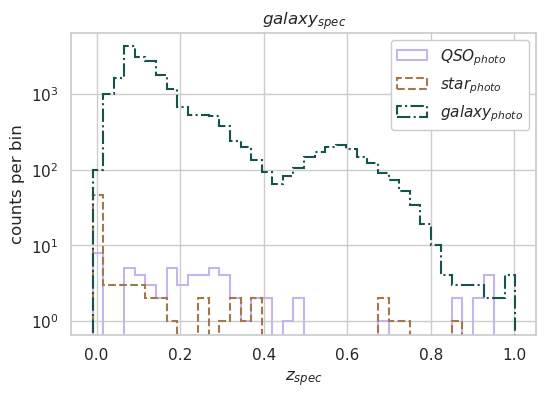

spec. subsets
MSE: 1.6566
GALAXY: 1.5388, QSO: 0.1329, STAR: 2.9764
R2: -3.2789
GALAXY: -66.5324, QSO: 0.8314, STAR: -22810298.5593
rel. error: 0.8609
GALAXY: 0.8805, QSO: 0.0305, STAR: 1.3388
rel. error std: 0.7962
GALAXY: 0.5876, QSO: 0.1654, STAR: 1.088
photo subsets
MSE: 1.6566
GALAXY: 1.5343, QSO: 1.6454, STAR: 0.0216
R2: -3.2789
GALAXY: -18.9192, QSO: -0.9771, STAR: 0.9667
rel. error: 0.8609
GALAXY: 0.8679, QSO: 0.7725, STAR: 0.013
rel. error std: 0.7962
GALAXY: 0.5981, QSO: 0.8337, STAR: 0.0829


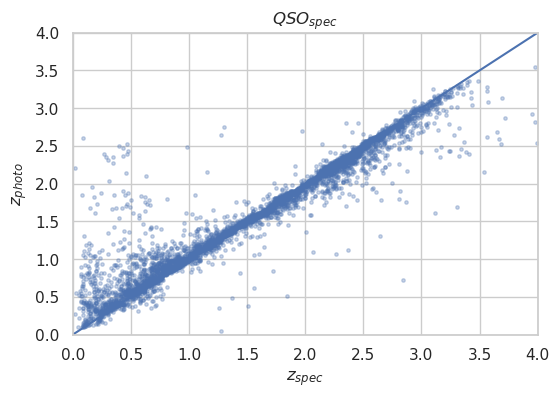

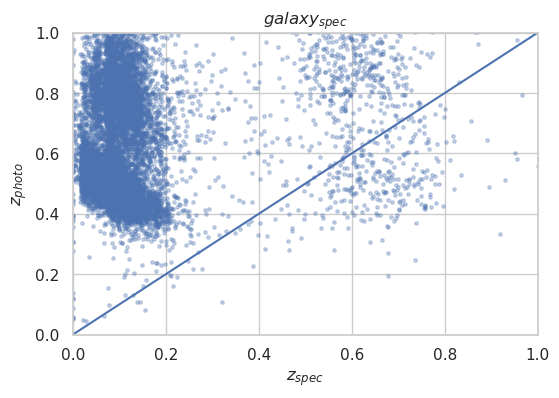

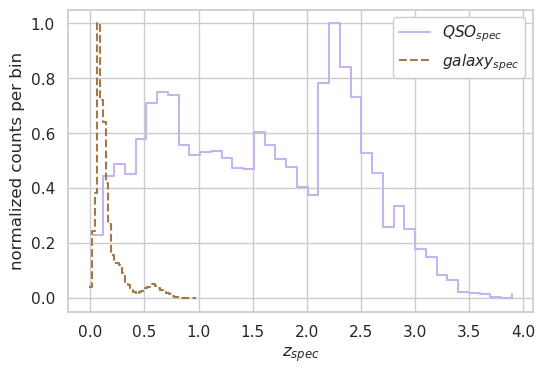

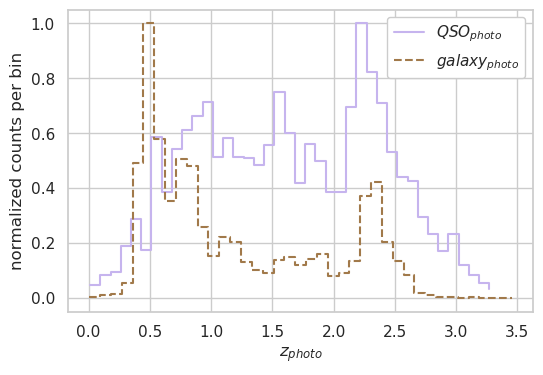

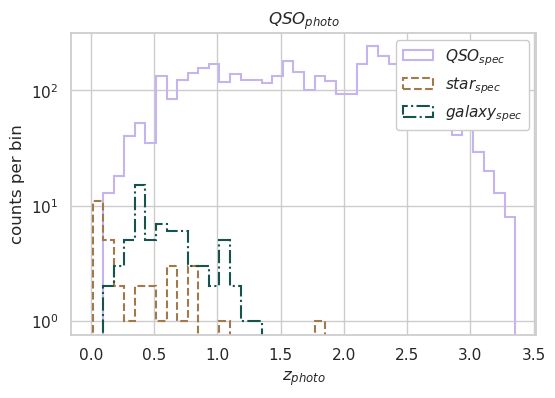

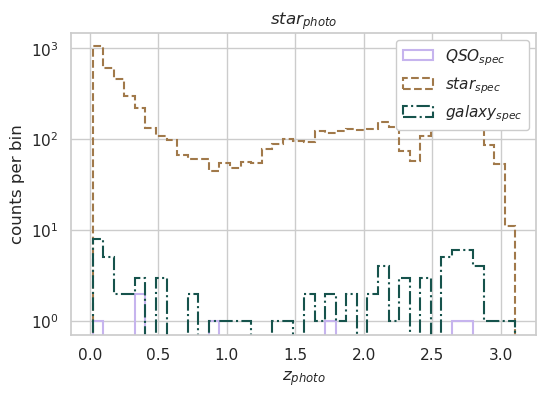

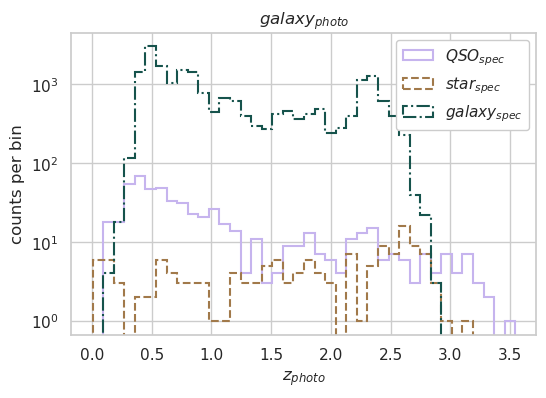

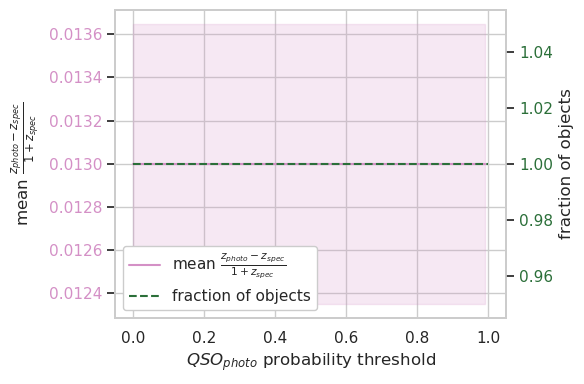

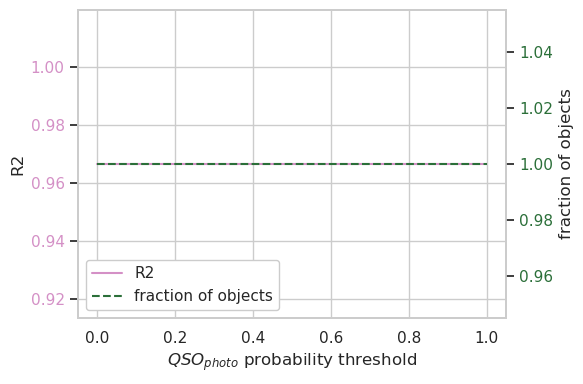

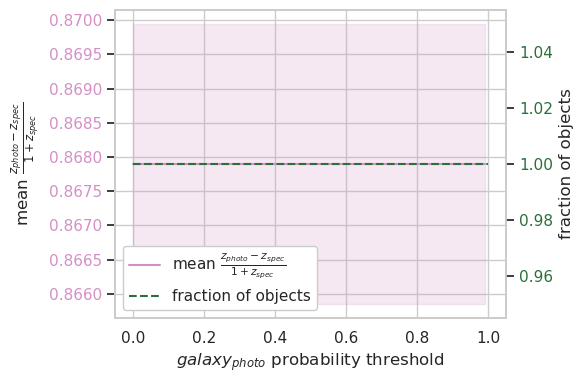

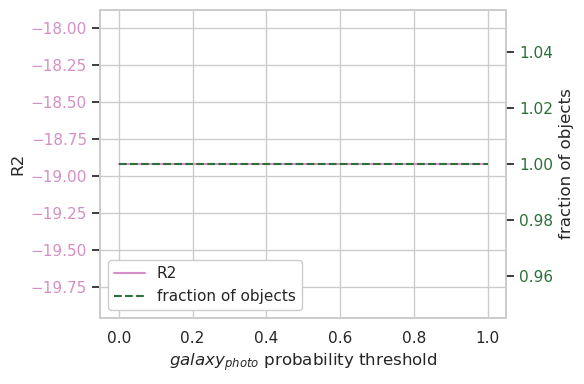

In [8]:
# Train at r < 21.3
experiment_report(logan_data.loc[bright_idx & train_idx], z_max=4)

../evaluation.py:79: UserWarning: KiDS columns not added due to lack of KiDS ID column
  warnings.warn('KiDS columns not added due to lack of KiDS ID column')


Number of objects: 451
Multiclass classification results:
Accuracy = 0.7938
F1 per class = [0.5792 0.     0.8741 0.6667]
Logloss = 5.7134


<Figure size 600x400 with 0 Axes>

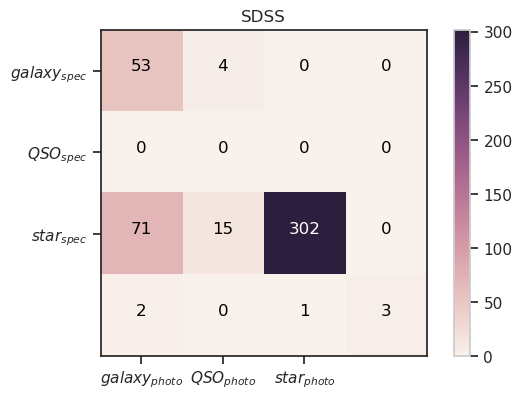

../plotting.py:239: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


<Figure size 600x400 with 0 Axes>

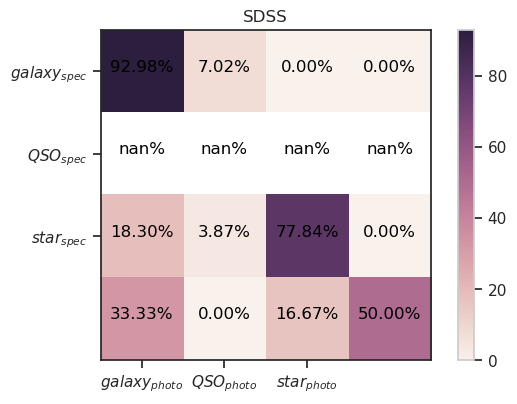

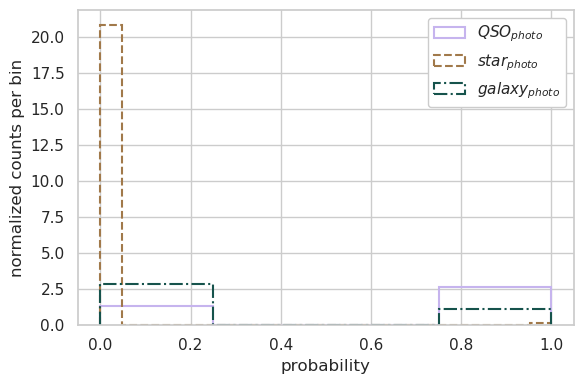

Binary classification results:
Predicted positives: 303/451 (67.18%)
Logloss = 6.6627
Accuracy = 0.8071
F1 = 0.8741
Precision = 0.9967
Recall = 0.7784
ROC AUC = 0.8812


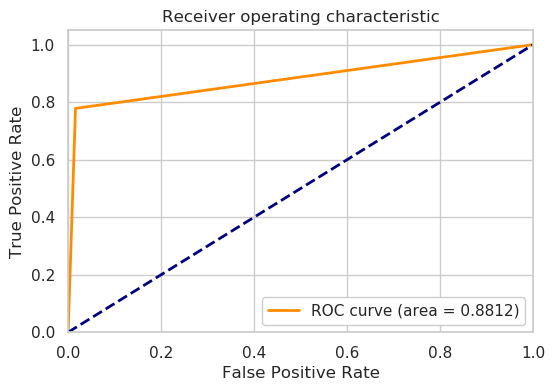

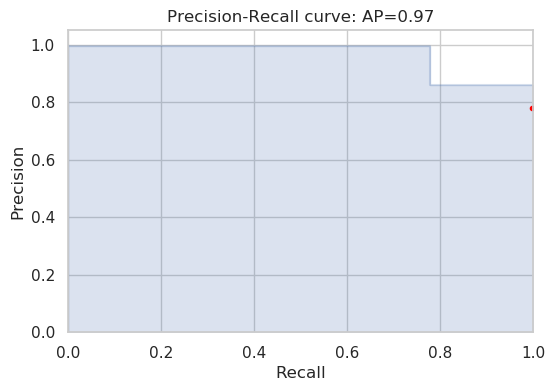

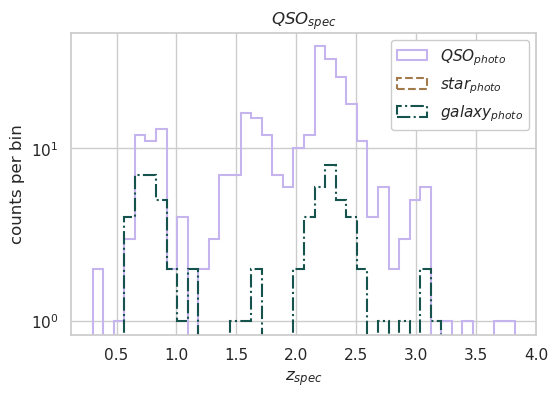

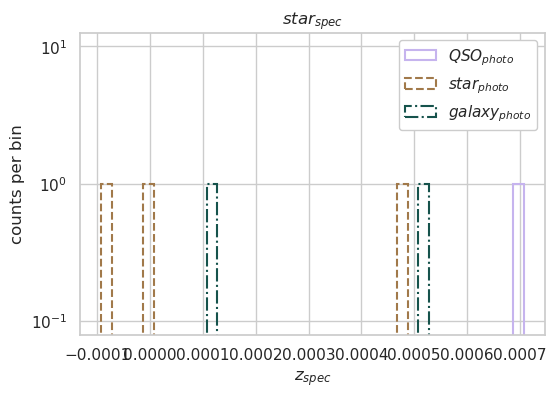

../evaluation.py:192: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:227: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  color=hist_color, **hist_kws)
../evaluation.py:192: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


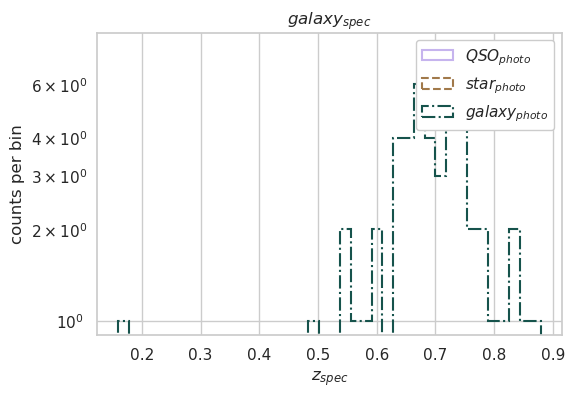

spec. subsets
MSE: 0.3543
GALAXY: 0.5872, QSO: 0.2484, STAR: 4.992
R2: 0.4926
GALAXY: -34.669, QSO: 0.5596, STAR: -57011494.5007
rel. error: 0.0653
GALAXY: 0.3524, QSO: -0.0089, STAR: 2.1335
rel. error std: 0.3349
GALAXY: 0.3664, QSO: 0.1421, STAR: 0.7255
photo subsets
MSE: 0.3543
GALAXY: 0.9285, QSO: 0.5725, STAR: 0.0445
R2: 0.4926
GALAXY: 0.0795, QSO: 0.0562, STAR: 0.8981
rel. error: 0.0653
GALAXY: 0.1815, QSO: 0.1598, STAR: -0.0128
rel. error std: 0.3349
GALAXY: 0.435, QSO: 0.4159, STAR: 0.0908


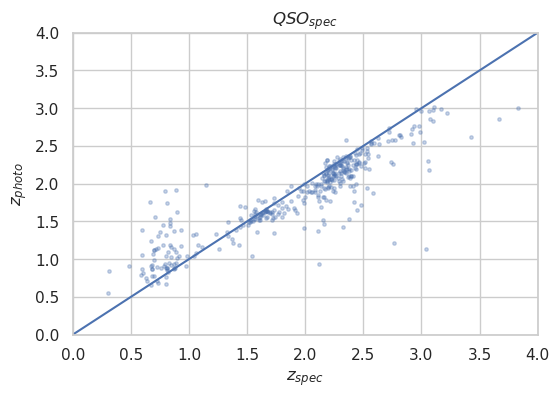

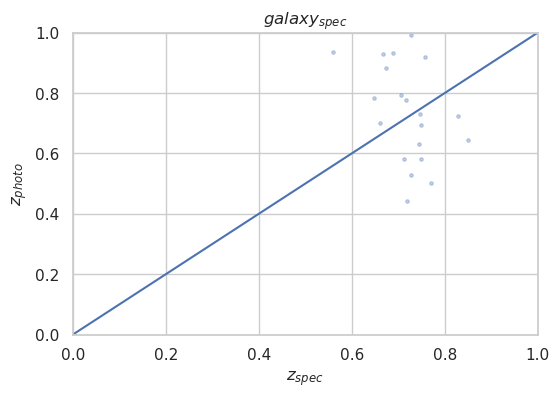

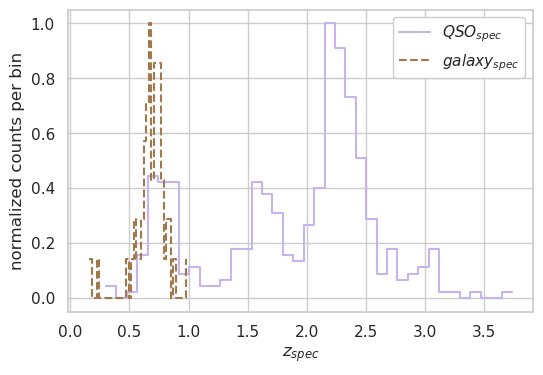

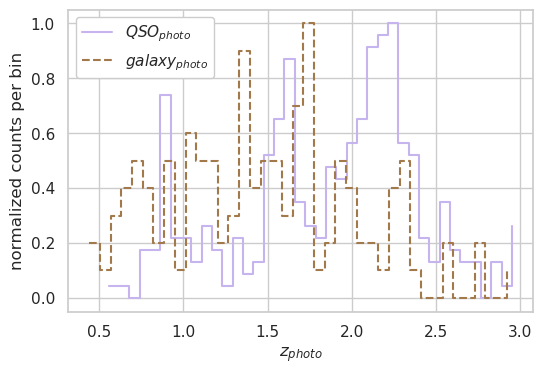

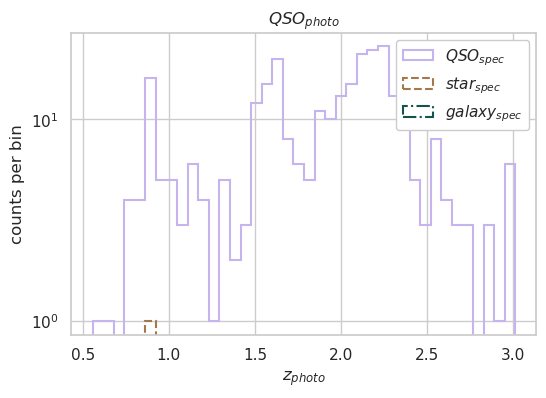

../evaluation.py:312: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


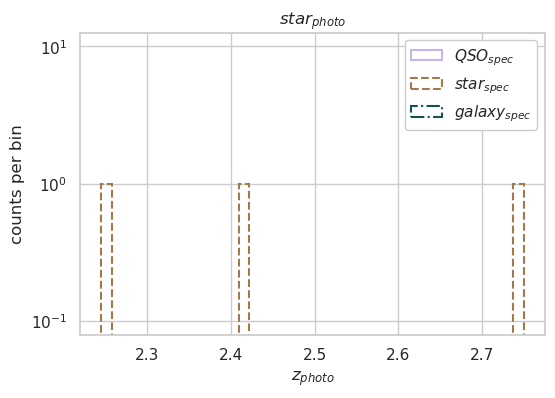

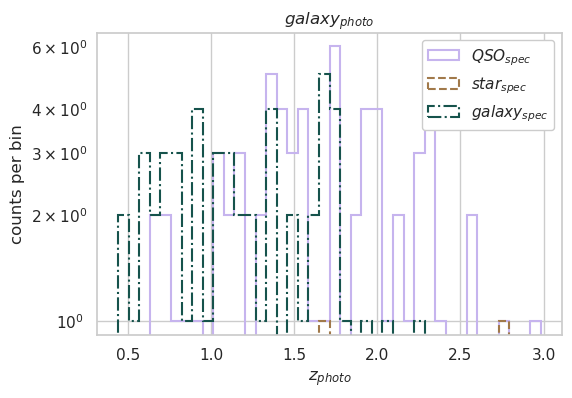

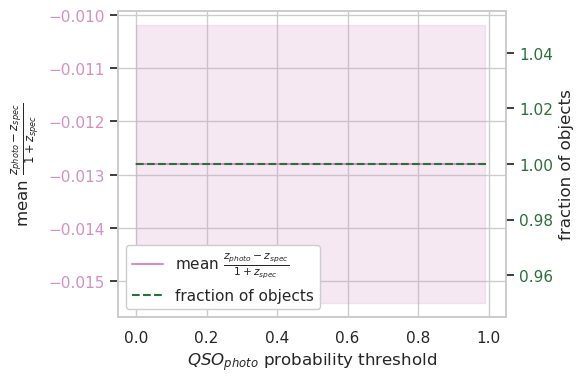

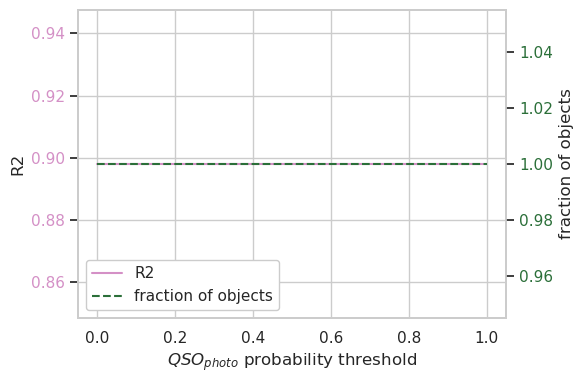

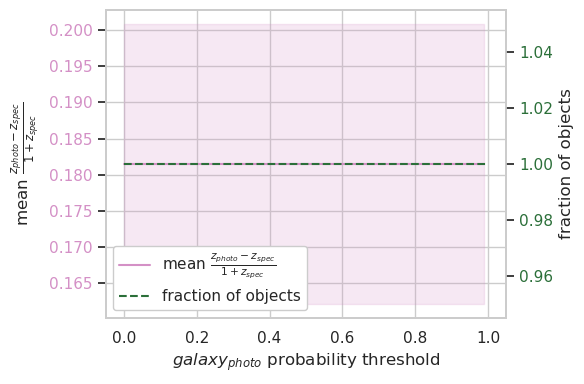

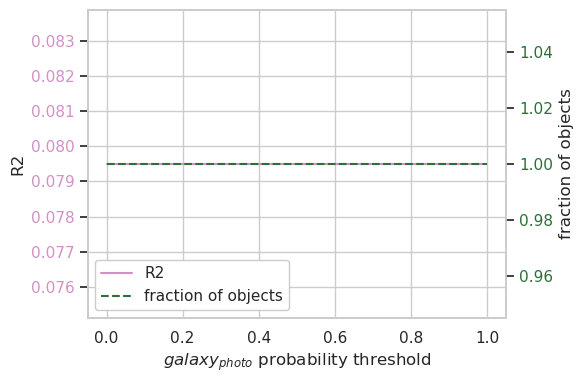

In [9]:
# Train at r > 21.3
experiment_report(logan_data.loc[faint_idx & train_idx], z_max=4)

../evaluation.py:79: UserWarning: KiDS columns not added due to lack of KiDS ID column
  warnings.warn('KiDS columns not added due to lack of KiDS ID column')


Number of objects: 10933
Multiclass classification results:
Accuracy = 0.9653
F1 per class = [0.9784 0.     0.9184 0.9717]
Logloss = 0.9557


<Figure size 600x400 with 0 Axes>

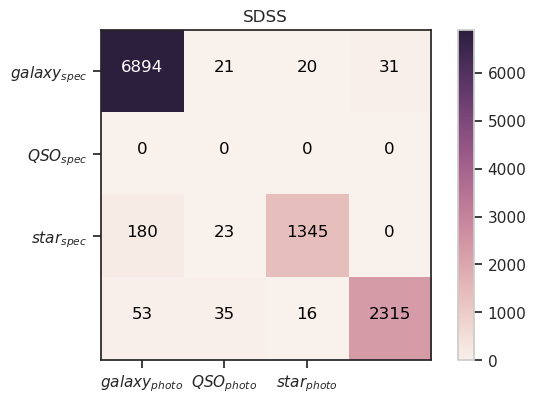

../plotting.py:239: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


<Figure size 600x400 with 0 Axes>

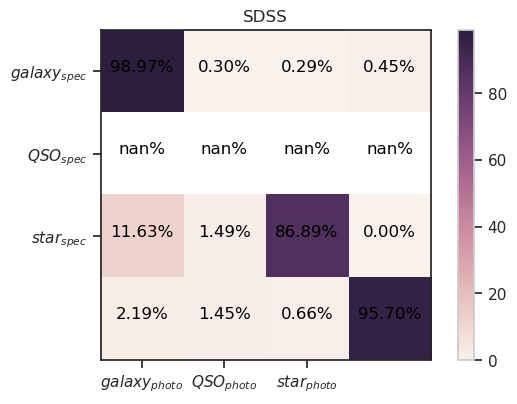

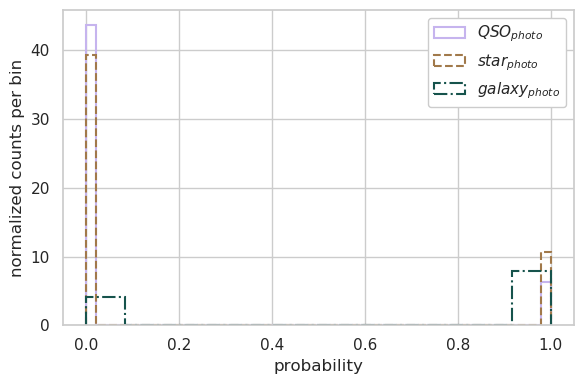

Binary classification results:
Predicted positives: 1381/10933 (12.63%)
Logloss = 0.7550
Accuracy = 0.9781
F1 = 0.9184
Precision = 0.9739
Recall = 0.8689
ROC AUC = 0.9325


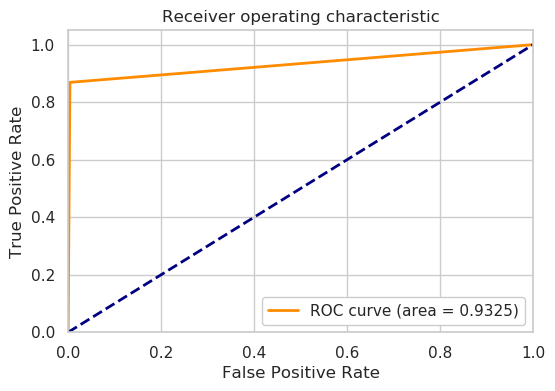

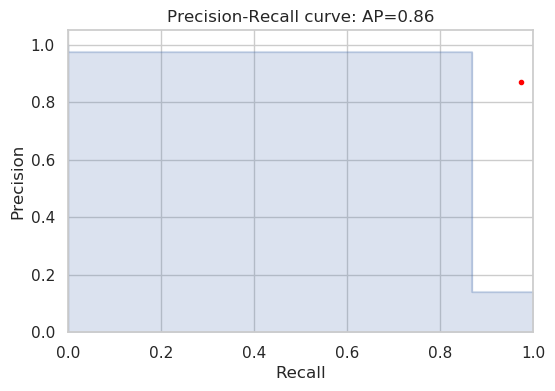

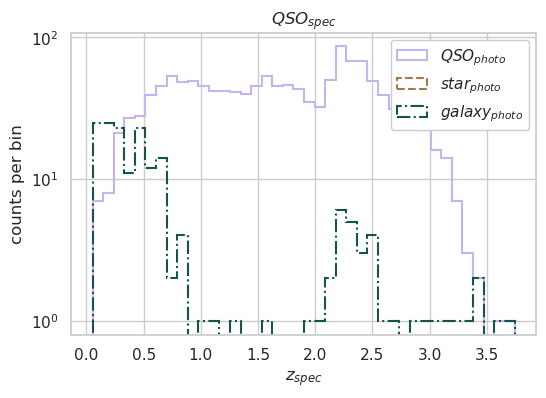

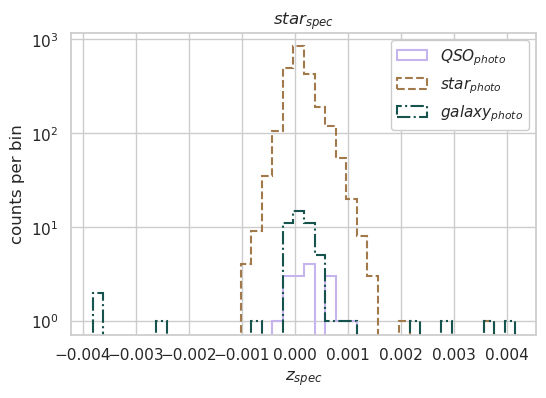

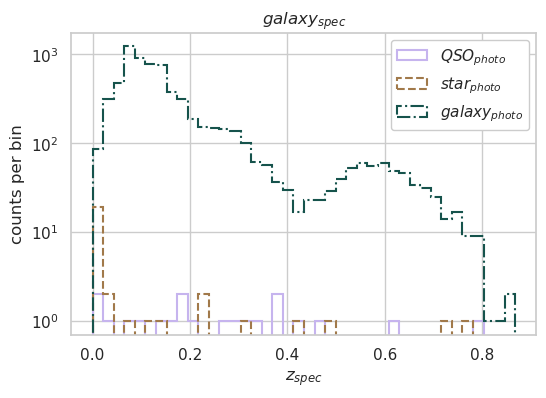

spec. subsets
MSE: 1.6714
GALAXY: 1.5088, QSO: 0.2096, STAR: 3.0752
R2: -3.2954
GALAXY: -64.896, QSO: 0.7311, STAR: -23298393.4352
rel. error: 0.8633
GALAXY: 0.8705, QSO: 0.0393, STAR: 1.3701
rel. error std: 0.8008
GALAXY: 0.5837, QSO: 0.2107, STAR: 1.0945
photo subsets
MSE: 1.6714
GALAXY: 1.5076, QSO: 2.1333, STAR: 0.1456
R2: -3.2954
GALAXY: -21.807, QSO: -1.864, STAR: 0.7838
rel. error: 0.8633
GALAXY: 0.8607, QSO: 0.9205, STAR: 0.0381
rel. error std: 0.8008
GALAXY: 0.595, QSO: 0.9575, STAR: 0.2231


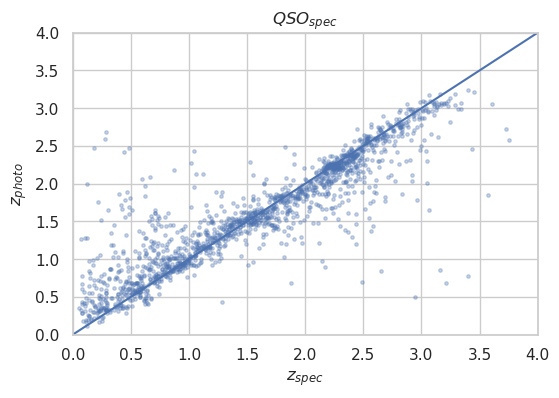

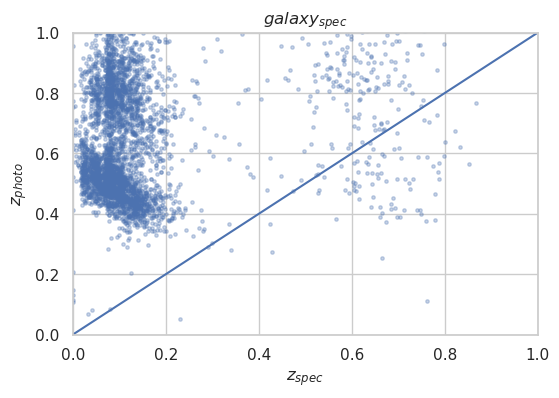

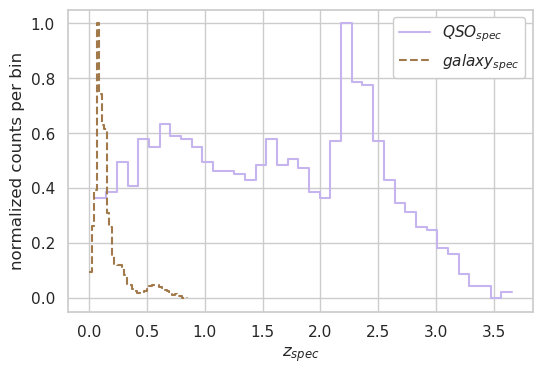

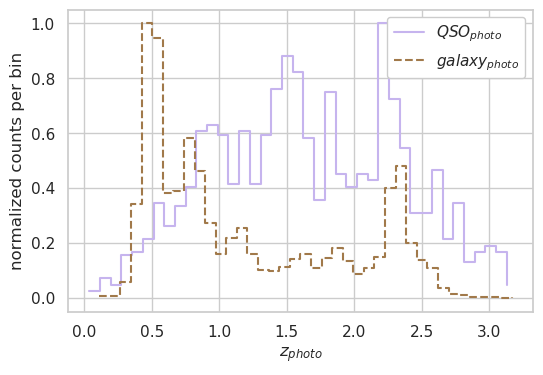

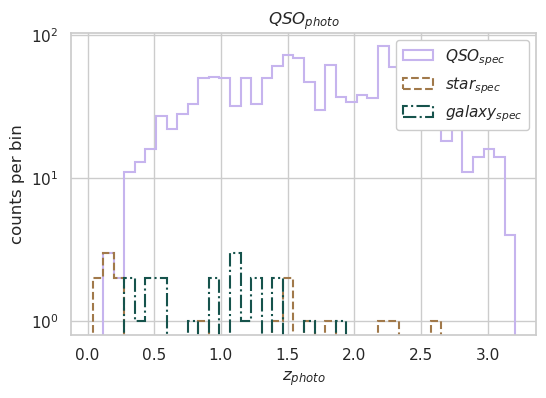

../evaluation.py:312: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


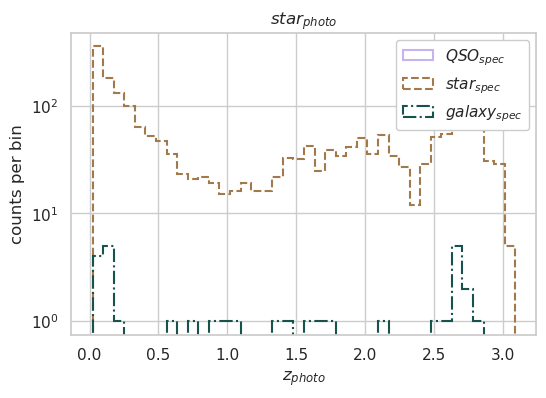

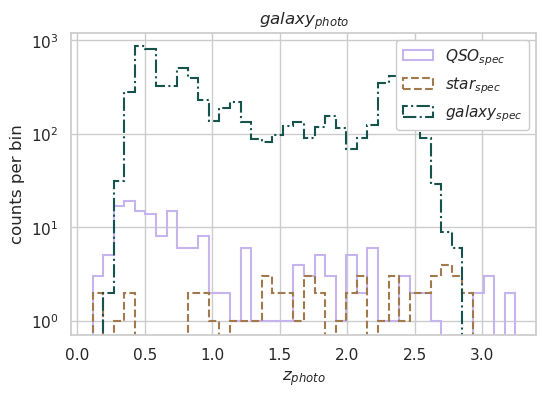

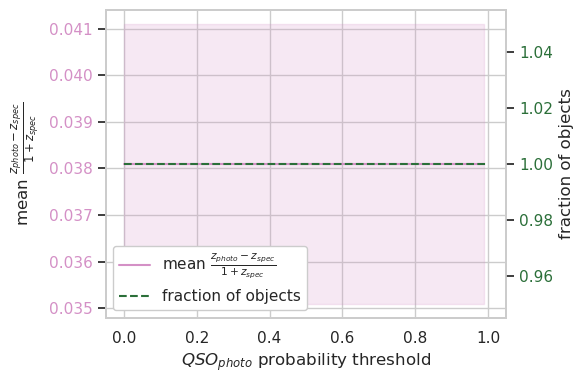

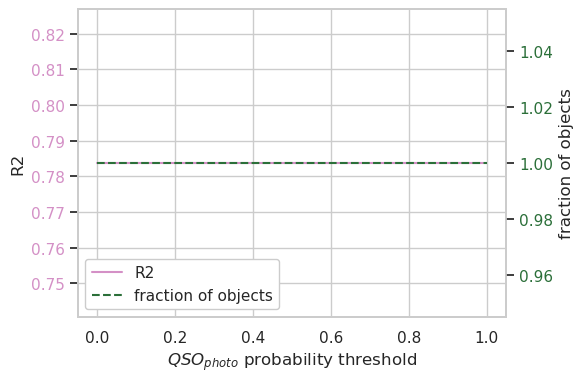

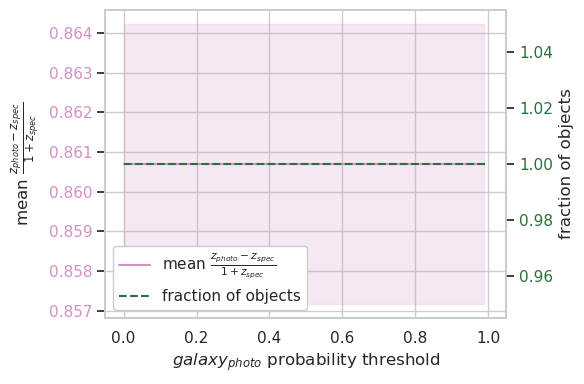

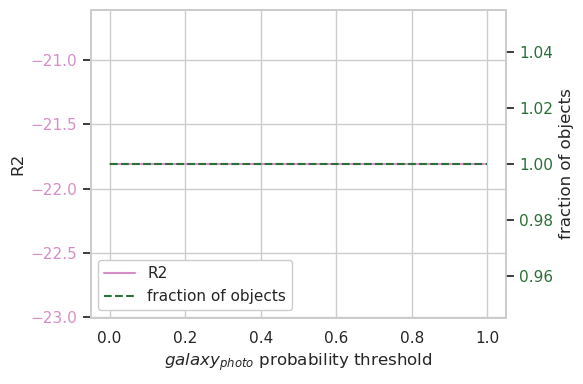

In [10]:
# Validation at r < 21.3
experiment_report(logan_data.loc[bright_idx & validation_idx], z_max=4)

In [11]:
# Validation at r > 21.3
experiment_report(logan_data.loc[faint_idx & validation_idx], z_max=4)

../evaluation.py:79: UserWarning: KiDS columns not added due to lack of KiDS ID column
  warnings.warn('KiDS columns not added due to lack of KiDS ID column')


Number of objects: 142
Multiclass classification results:
Accuracy = 0.8662
F1 per class = [0.717  0.     0.9163]


ValueError: y_true and y_pred contain different number of classes 2, 3. Please provide the true labels explicitly through the labels argument. Classes found in y_true: ['GALAXY' 'QSO']

../evaluation.py:79: UserWarning: KiDS columns not added due to lack of KiDS ID column
  warnings.warn('KiDS columns not added due to lack of KiDS ID column')


Number of objects: 10943
Multiclass classification results:
Accuracy = 0.9657
F1 per class = [0.9789 0.     0.9186 0.9742]
Logloss = 0.9025


<Figure size 600x400 with 0 Axes>

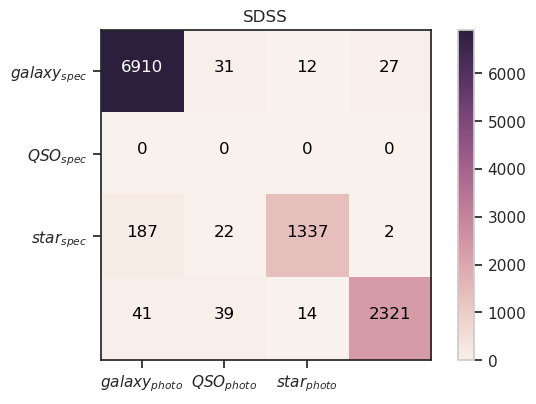

../plotting.py:239: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


<Figure size 600x400 with 0 Axes>

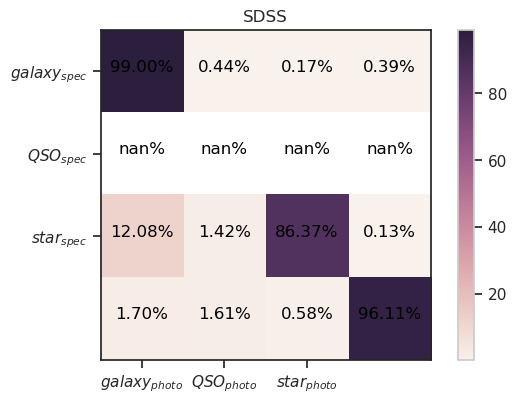

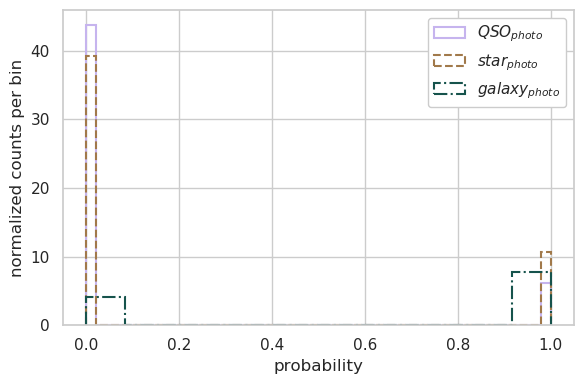

Binary classification results:
Predicted positives: 1363/10943 (12.46%)
Logloss = 0.7480
Accuracy = 0.9783
F1 = 0.9186
Precision = 0.9809
Recall = 0.8637
ROC AUC = 0.9305


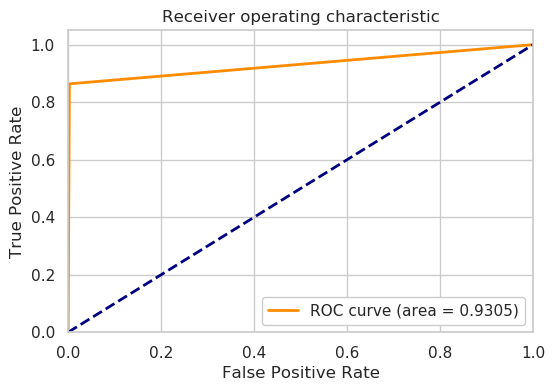

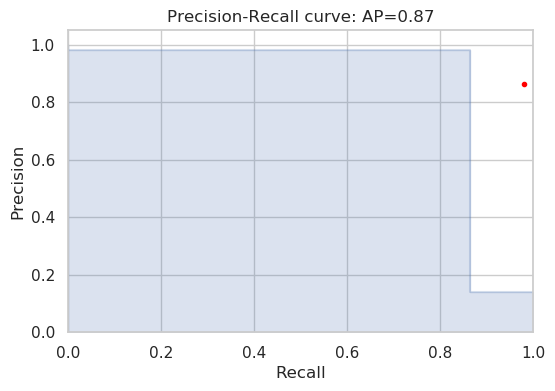

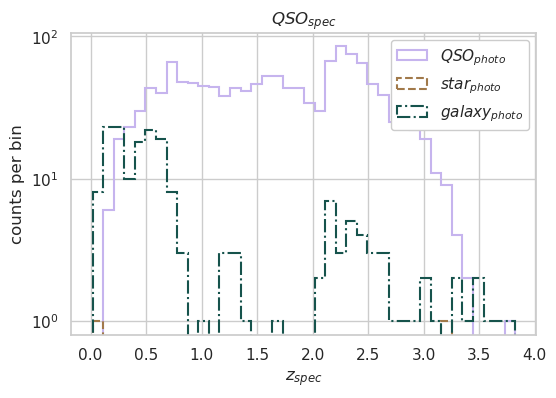

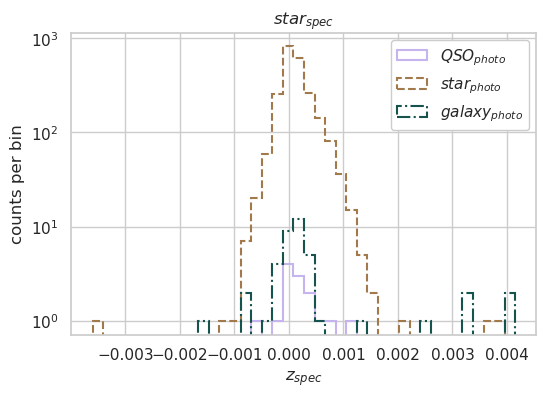

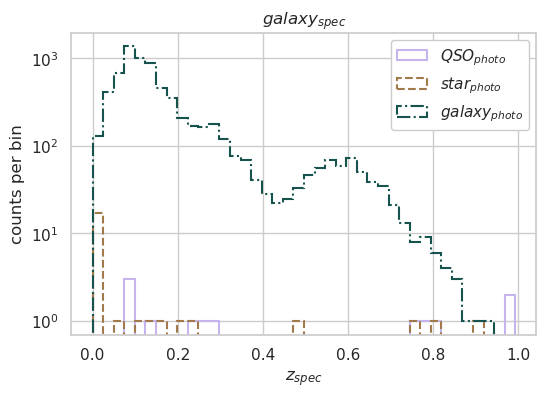

spec. subsets
MSE: 1.6792
GALAXY: 1.562, QSO: 0.1917, STAR: 2.9712
R2: -3.2745
GALAXY: -66.5974, QSO: 0.7543, STAR: -21881109.5979
rel. error: 0.868
GALAXY: 0.8904, QSO: 0.0318, STAR: 1.3393
rel. error std: 0.7944
GALAXY: 0.5847, QSO: 0.1869, STAR: 1.0851
photo subsets
MSE: 1.6792
GALAXY: 1.5489, QSO: 1.7031, STAR: 0.1542
R2: -3.2745
GALAXY: -20.5507, QSO: -4.4354, STAR: 0.7748
rel. error: 0.868
GALAXY: 0.8759, QSO: 0.936, STAR: 0.0299
rel. error std: 0.7944
GALAXY: 0.5952, QSO: 0.8636, STAR: 0.2051


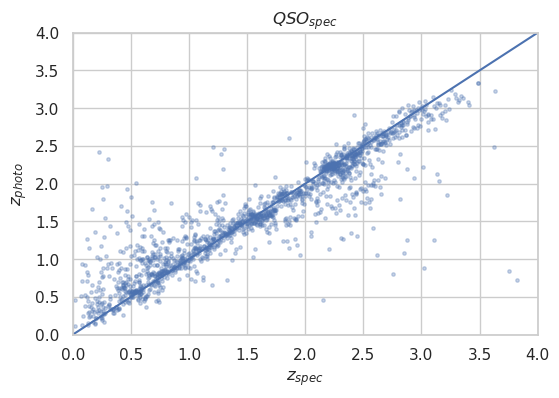

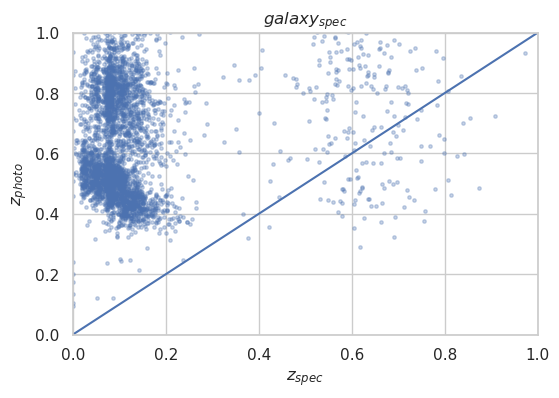

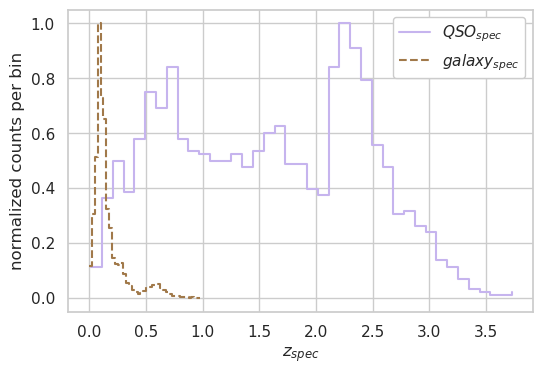

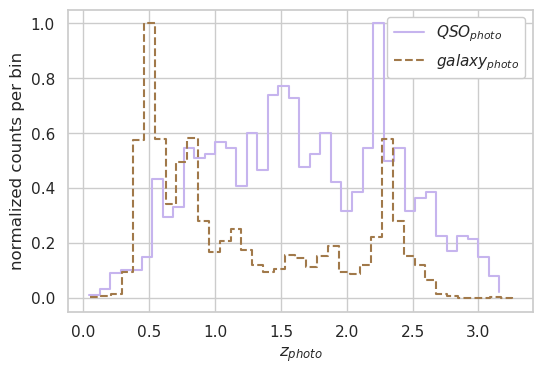

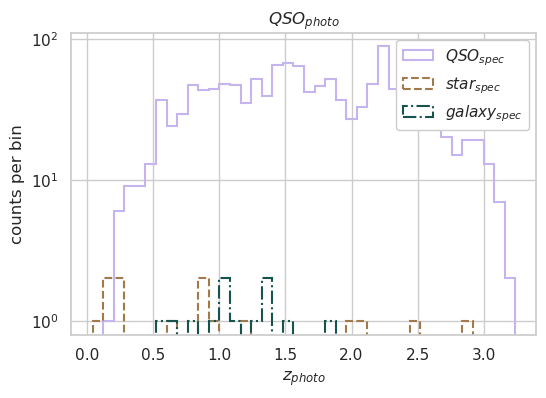

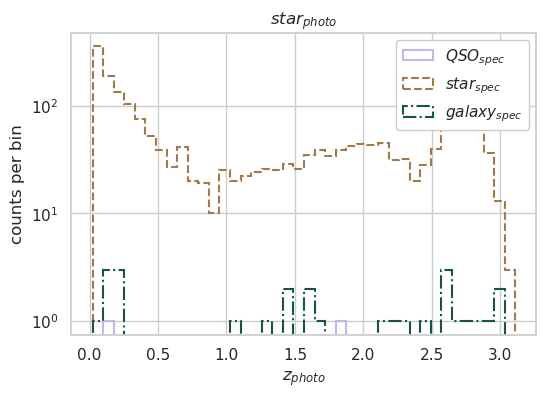

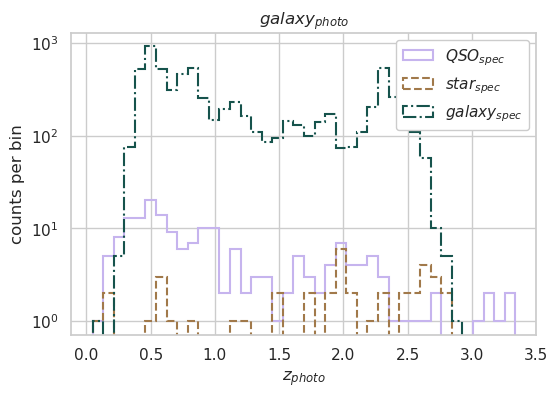

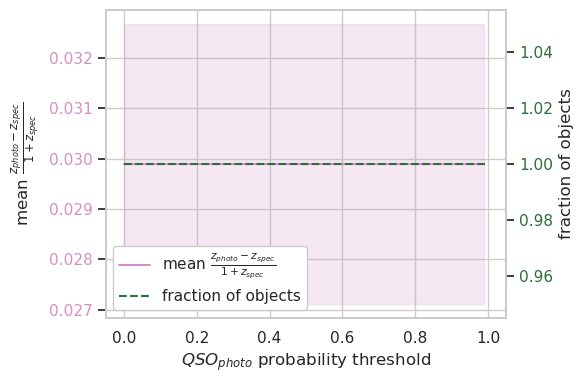

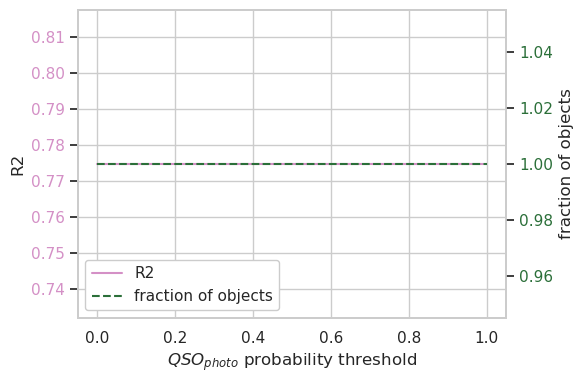

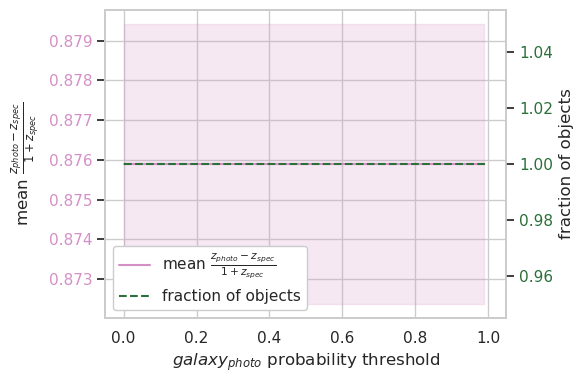

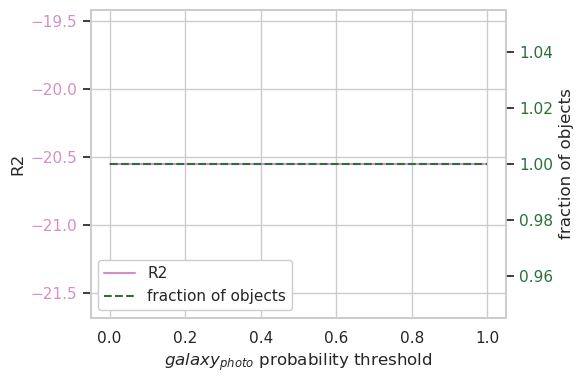

In [12]:
# Test at r < 21.3
experiment_report(logan_data.loc[bright_idx & test_idx], z_max=4)

../evaluation.py:79: UserWarning: KiDS columns not added due to lack of KiDS ID column
  warnings.warn('KiDS columns not added due to lack of KiDS ID column')


Number of objects: 133
Multiclass classification results:
Accuracy = 0.8421
F1 per class = [0.55   0.     0.9182 0.    ]
Logloss = 4.6992


<Figure size 600x400 with 0 Axes>

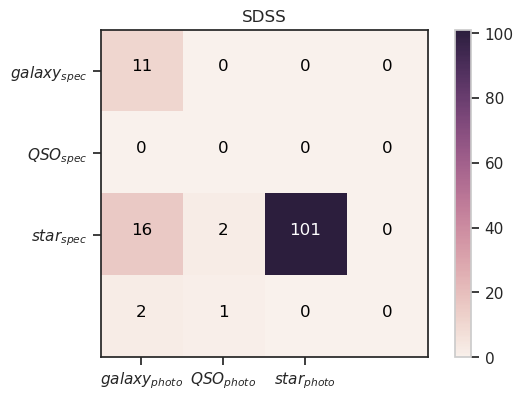

../plotting.py:239: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


<Figure size 600x400 with 0 Axes>

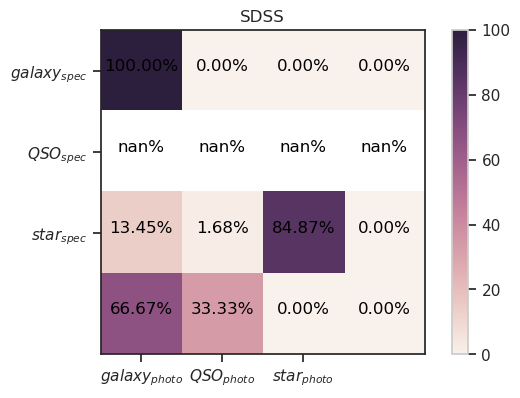

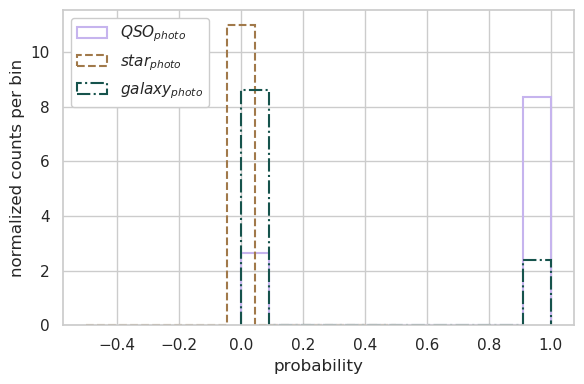

Binary classification results:
Predicted positives: 101/133 (75.94%)
Logloss = 4.6744
Accuracy = 0.8647
F1 = 0.9182
Precision = 1.0000
Recall = 0.8487
ROC AUC = 0.9244


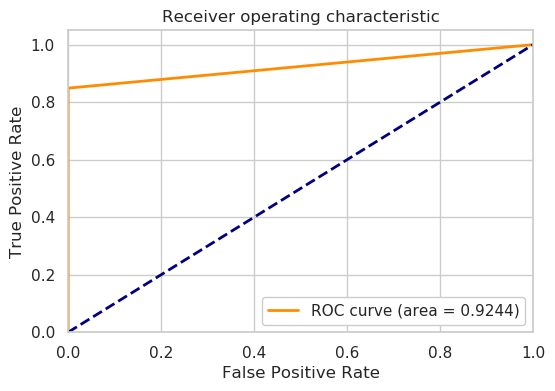

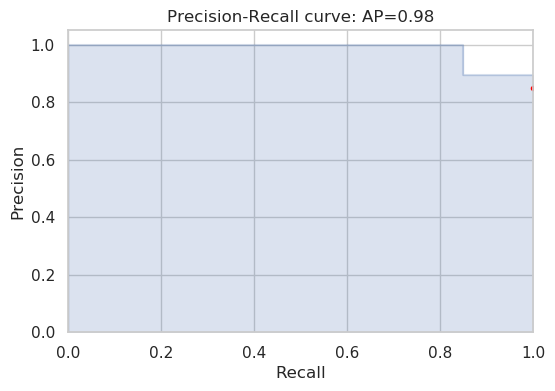

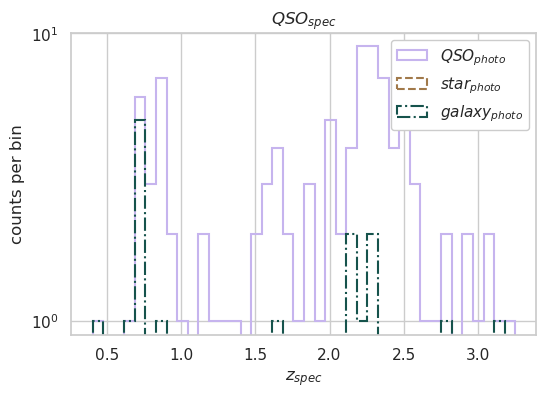

../evaluation.py:192: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:227: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  color=hist_color, **hist_kws)
../evaluation.py:192: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


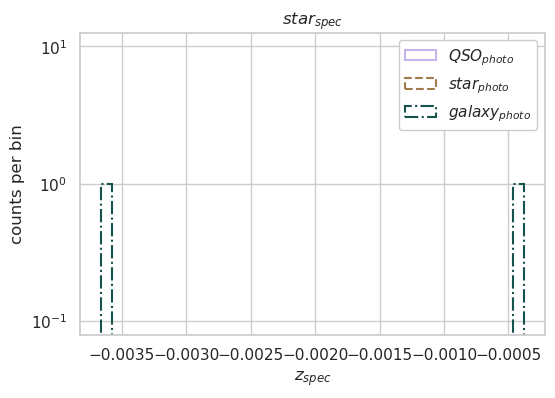

../evaluation.py:192: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:227: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  color=hist_color, **hist_kws)
../evaluation.py:192: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


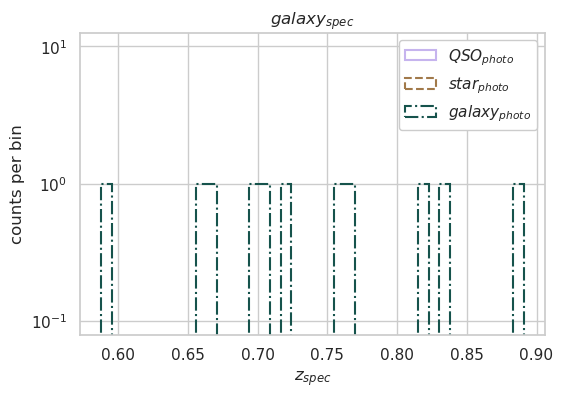

spec. subsets
MSE: 0.4734
GALAXY: 0.3548, QSO: 0.4066, STAR: 3.5546
R2: 0.2645
GALAXY: -49.7938, QSO: 0.2462, STAR: -1319358.1402
rel. error: 0.0429
GALAXY: 0.1573, QSO: -0.0111, STAR: 1.7659
rel. error std: 0.3786
GALAXY: 0.3376, QSO: 0.2447, STAR: 0.8115
photo subsets
MSE: 0.4734
GALAXY: 0.6373, QSO: 2.1669, STAR: 0.376
R2: 0.2645
GALAXY: 0.0194, QSO: -3.4632, STAR: 0.2328
rel. error: 0.0429
GALAXY: 0.229, QSO: 0.8117, STAR: -0.0333
rel. error std: 0.3786
GALAXY: 0.4834, QSO: 1.4989, STAR: 0.2126


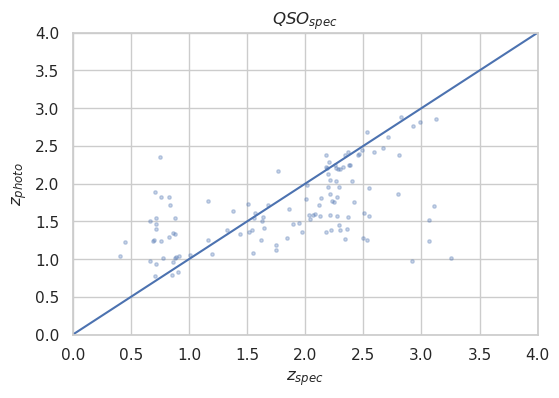

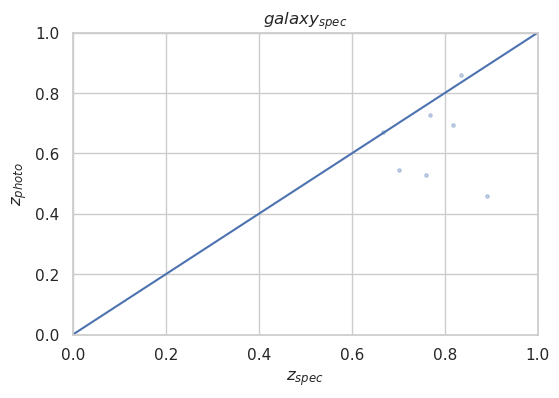

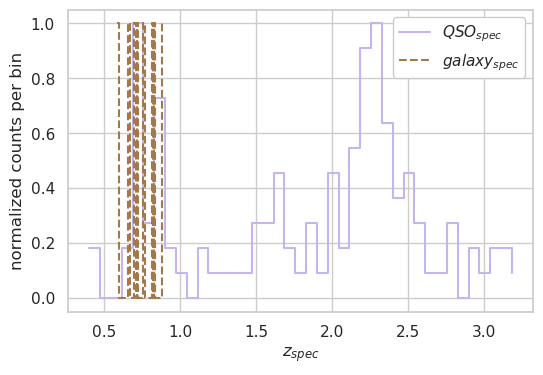

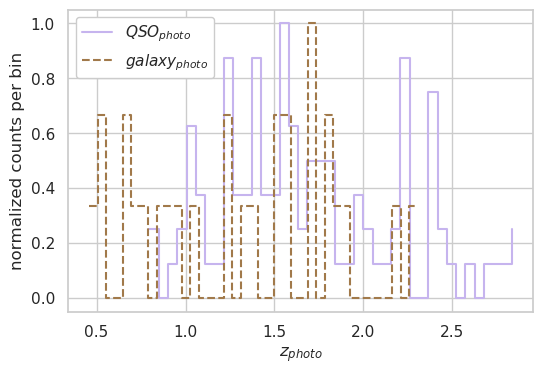

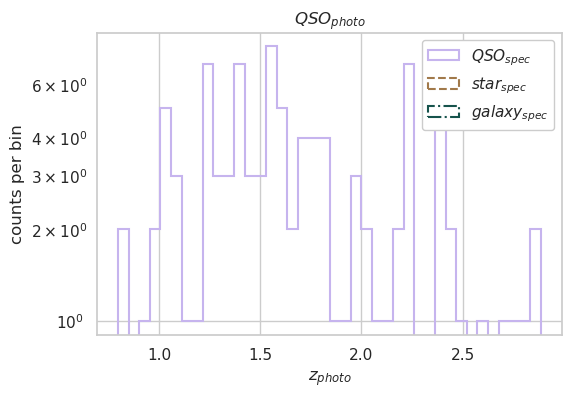

../evaluation.py:312: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:227: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  color=hist_color, **hist_kws)
../evaluation.py:312: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:227: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  color=hist_color, **hist_kws)
../evaluation.py:312: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


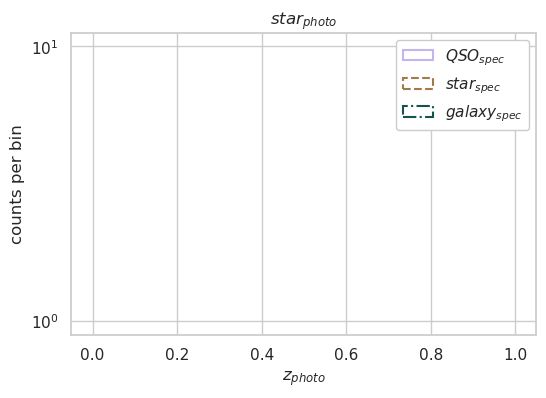

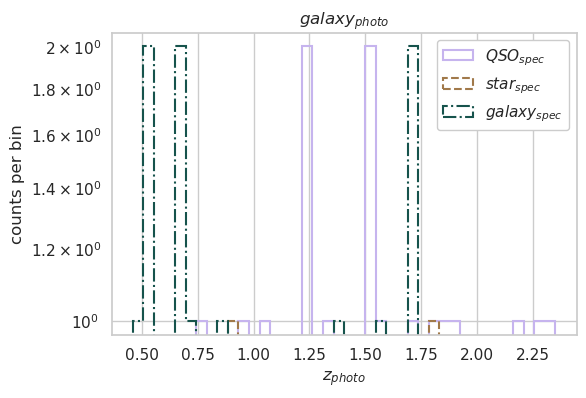

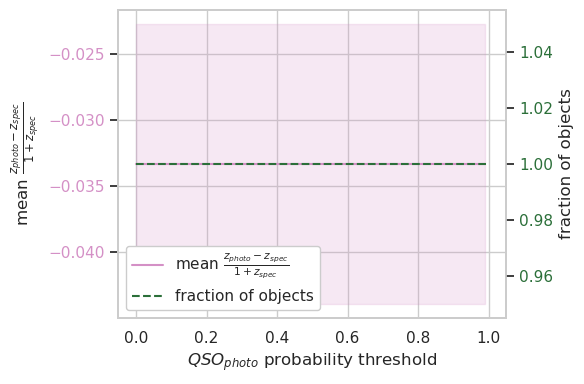

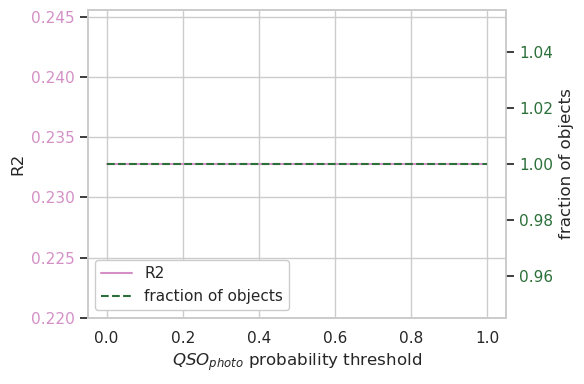

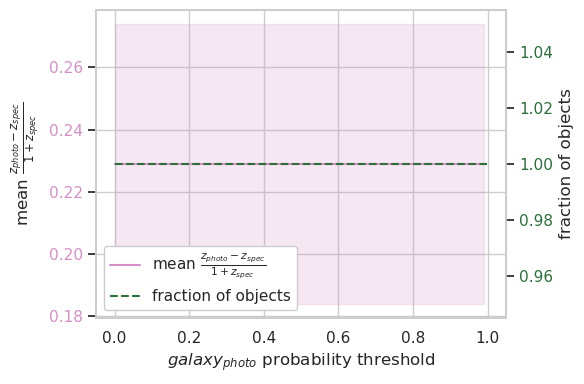

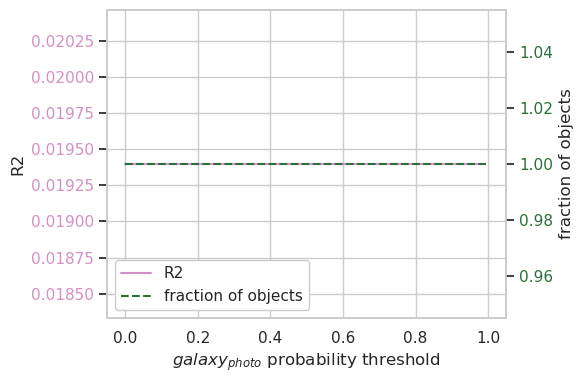

In [13]:
# Test at r > 21.3
experiment_report(logan_data.loc[faint_idx & test_idx], z_max=4)

# Results from final catalogs' comparison
- no train/validation/test distinction, because validation/test sets are different between our catalogs and there's no cross-section
- instead, take data fainter than SDSS and show how two catalog's differ

In [43]:
# Read Logan x Catalog
data = read_fits_to_pandas(os.path.join(DATA_PATH, 'KiDS/DR4/external/KiDS_DR4_2020-06-08_x_Logan_2020.fits'))

# Get only data with spectroscopic labels and redshifts
data_train = data.loc[data['phztrain'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]

# Adjust for reports
data_train_nakoneczny = adjust_nakoneczny_to_report(data_train)
data_train_logan = adjust_logan_to_report(data_train)

In [53]:
r_limit = data_train_logan['rmag'].quantile(q=0.9)
print(r_limit)

20.255850601196293


Number of objects: 46260
Multiclass classification results:
Accuracy = 0.9883
F1 per class = [0.992  0.9634 0.9898]
Logloss = 0.0517


<Figure size 600x400 with 0 Axes>

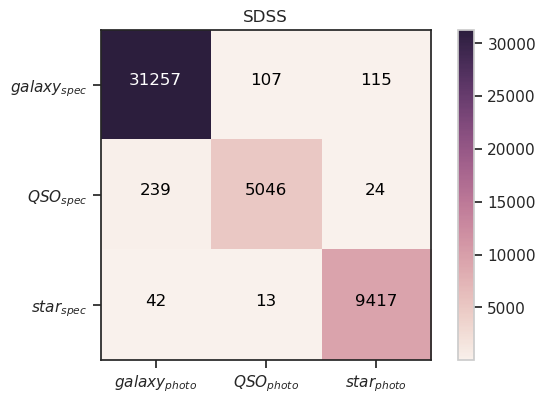

<Figure size 600x400 with 0 Axes>

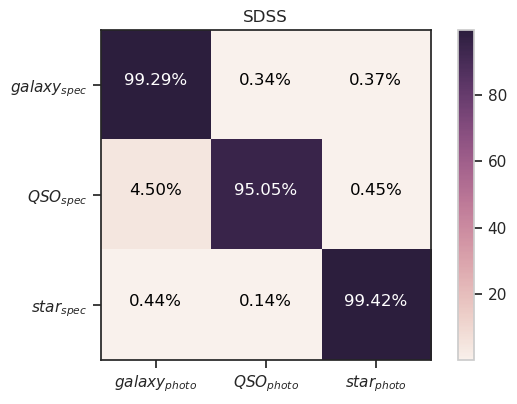

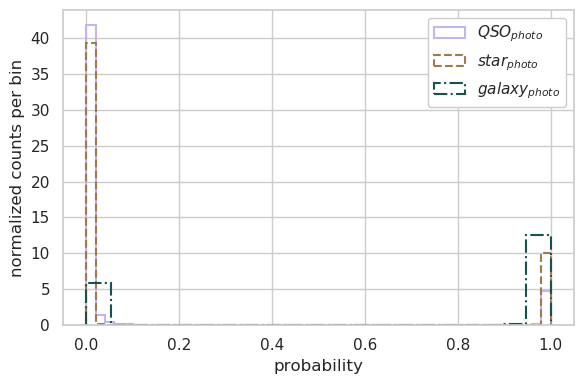

Binary classification results:
Predicted positives: 5166/46260 (11.17%)
Logloss = 0.0314
Accuracy = 0.9917
F1 = 0.9634
Precision = 0.9768
Recall = 0.9505
ROC AUC = 0.9959


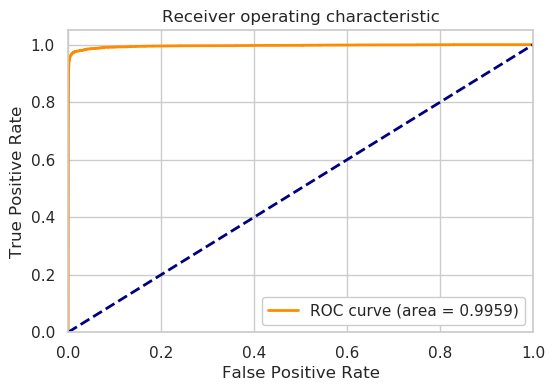

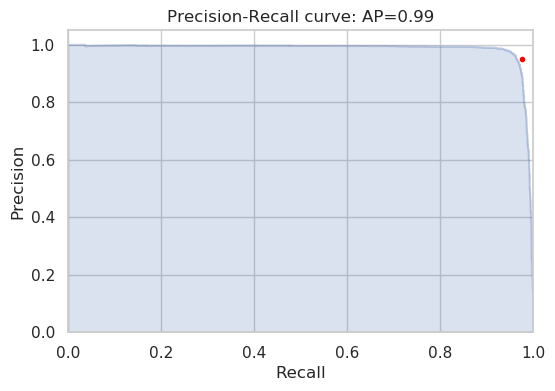

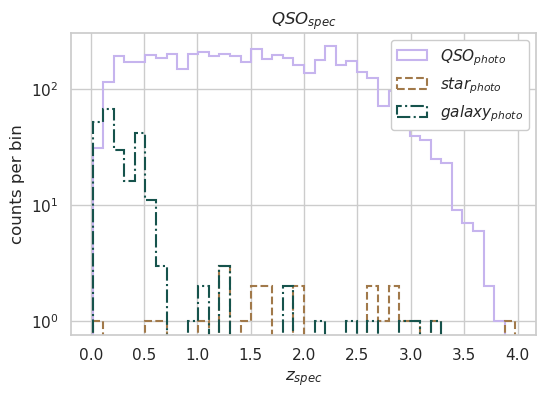

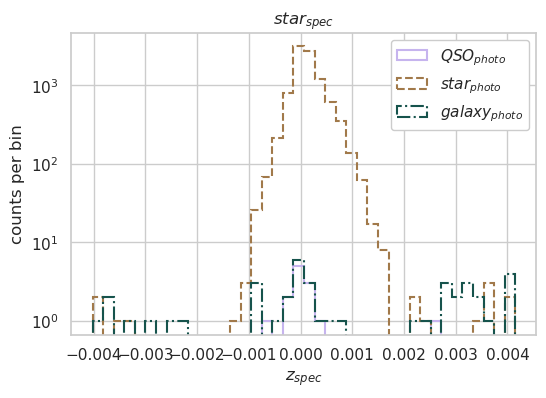

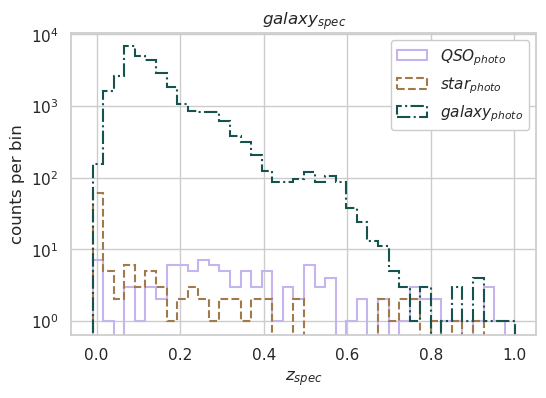

spec. subsets
MSE: 1.8487999439239502
GALAXY: 0.6758999824523926, QSO: 0.10140000283718109, STAR: 6.725900173187256
R2: -5.648
GALAXY: -63.8489, QSO: 0.8601, STAR: -49782736.0876
rel. error: 0.9498999714851379
GALAXY: 0.6154999732971191, QSO: 0.026499999687075615, STAR: 2.578900098800659
rel. error std: 0.9293000102043152
GALAXY: 0.435699999332428, QSO: 0.1370999962091446, STAR: 0.2709999978542328
photo subsets
MSE: 1.8487999439239502
GALAXY: 0.6596999764442444, QSO: 0.08940000087022781, STAR: 6.724100112915039
R2: -5.648
GALAXY: -42.1344, QSO: 0.8705, STAR: -449.0732
rel. error: 0.9498999714851379
GALAXY: 0.608299970626831, QSO: 0.03009999915957451, STAR: 2.5745999813079834
rel. error std: 0.9293000102043152
GALAXY: 0.4269999861717224, QSO: 0.16429999470710754, STAR: 0.287200003862381


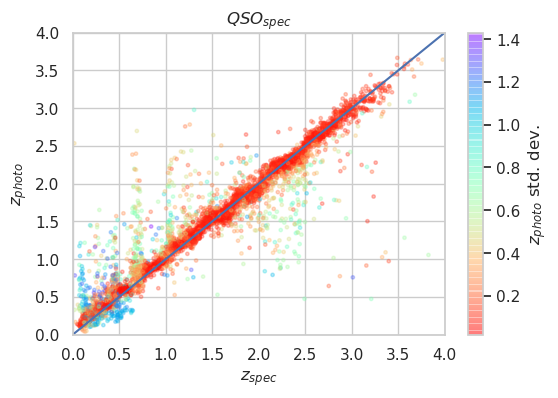

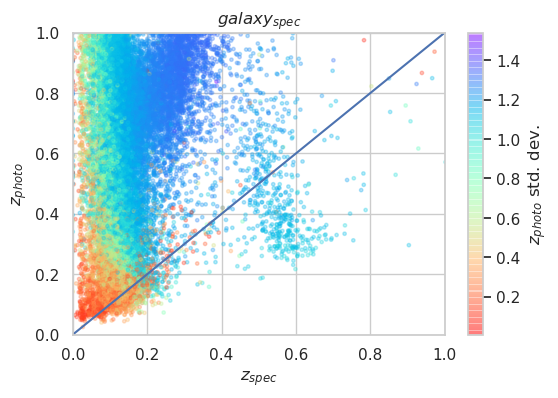

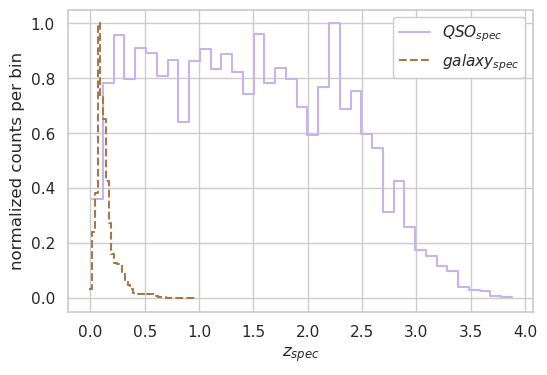

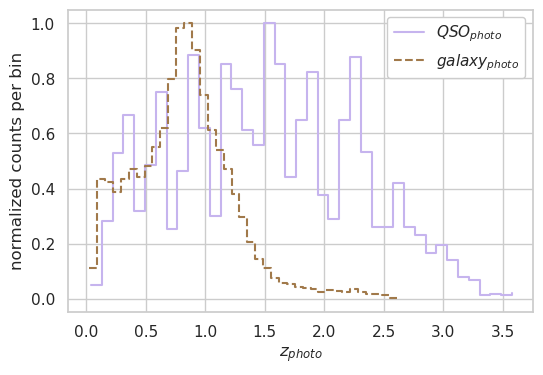

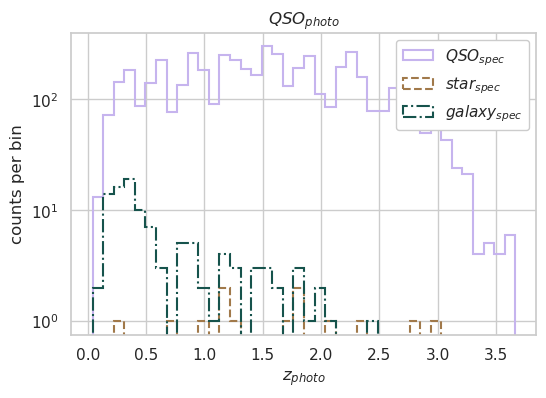

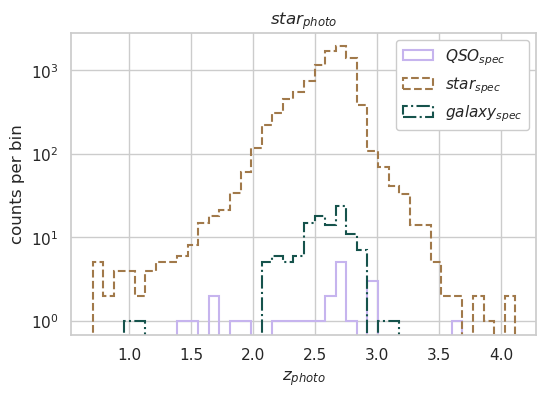

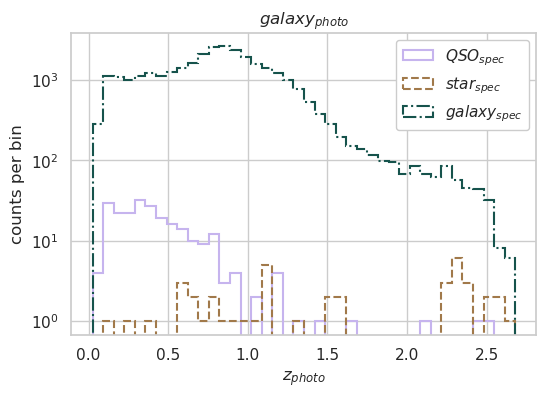

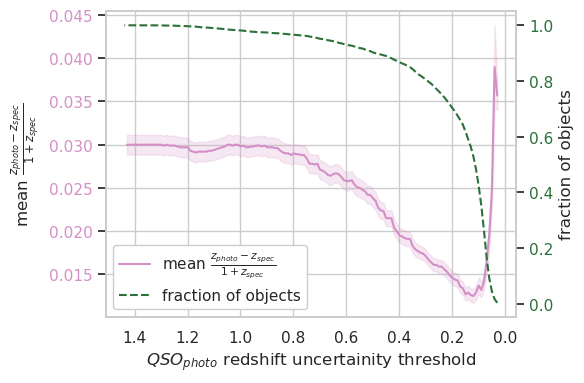

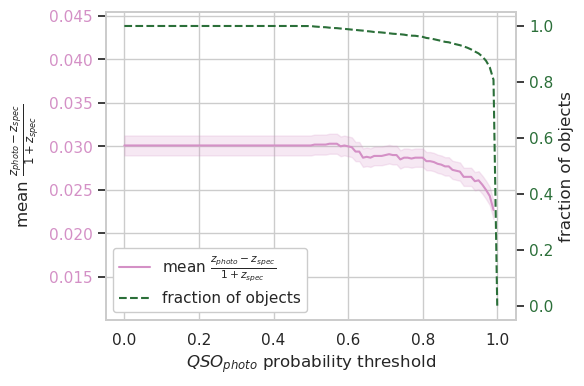

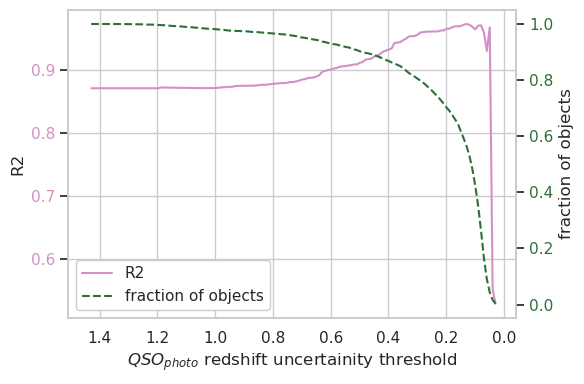

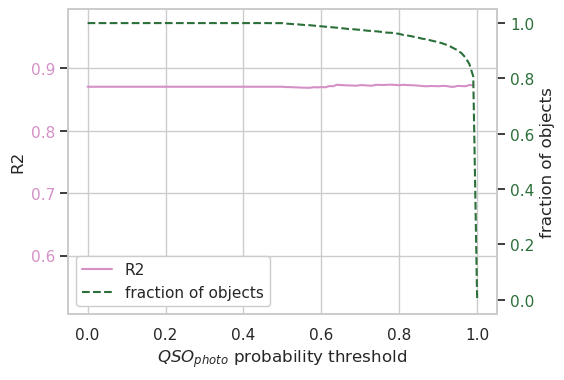

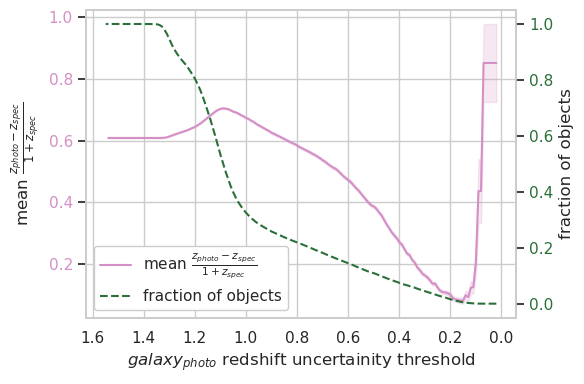

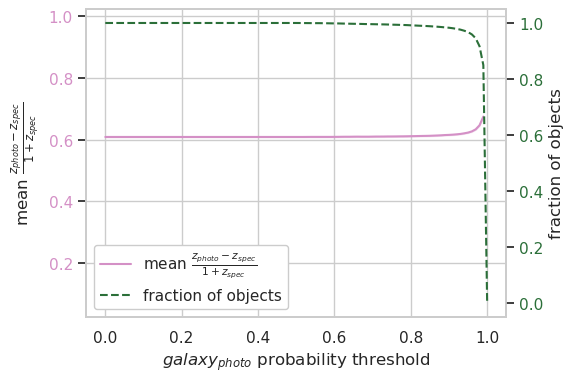

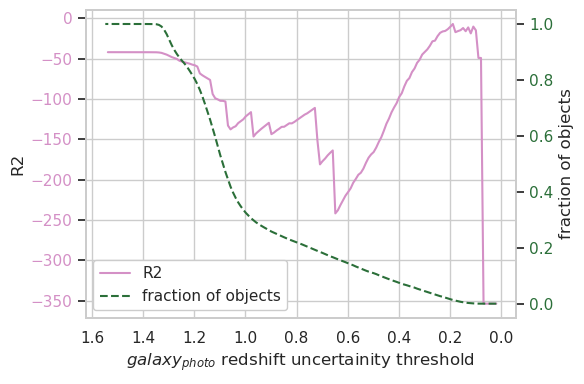

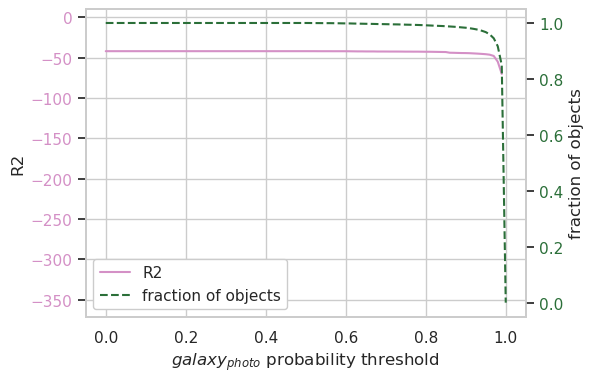

In [54]:
experiment_report(data_train_nakoneczny.loc[data_train_nakoneczny['rmag'] < r_limit], z_max=4)

Number of objects: 5135
Multiclass classification results:
Accuracy = 0.9587
F1 per class = [0.9575 0.9653 0.7845]
Logloss = 0.1465


<Figure size 600x400 with 0 Axes>

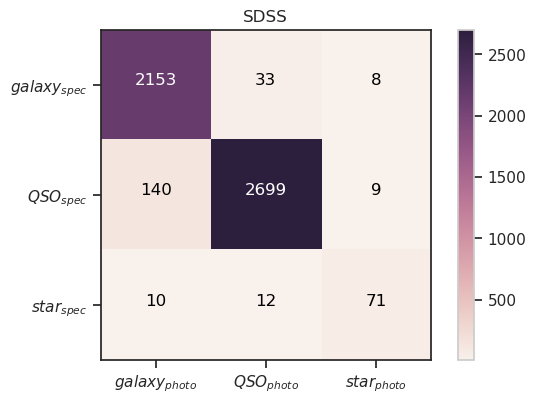

<Figure size 600x400 with 0 Axes>

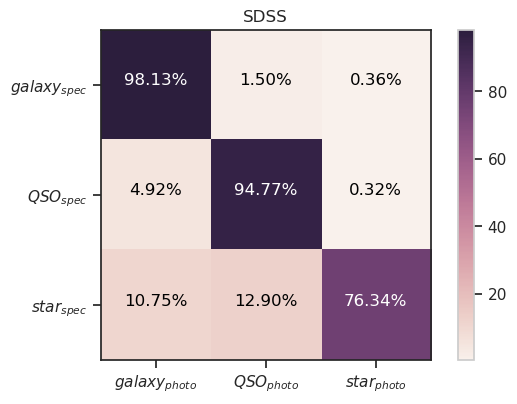

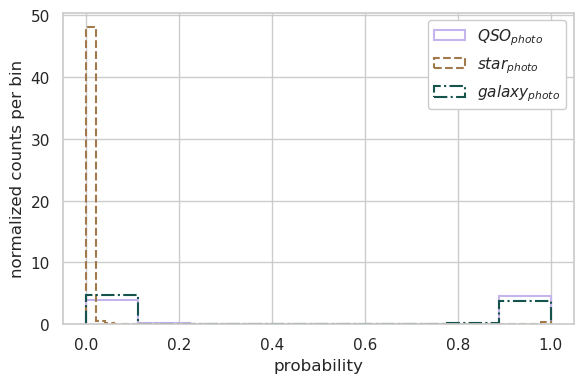

Binary classification results:
Predicted positives: 2744/5135 (53.44%)
Logloss = 0.1271
Accuracy = 0.9622
F1 = 0.9653
Precision = 0.9836
Recall = 0.9477
ROC AUC = 0.9867


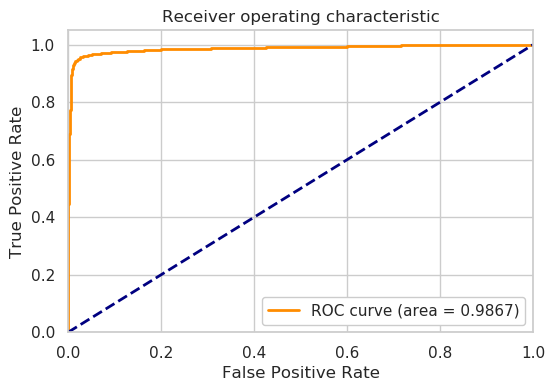

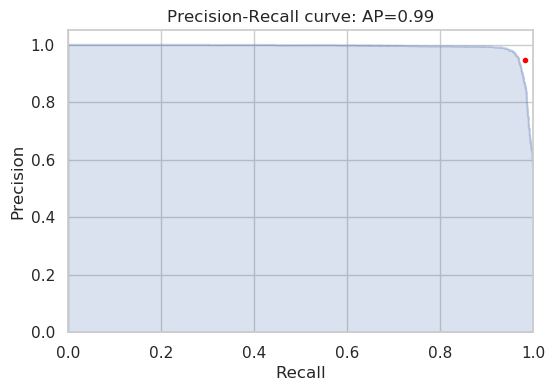

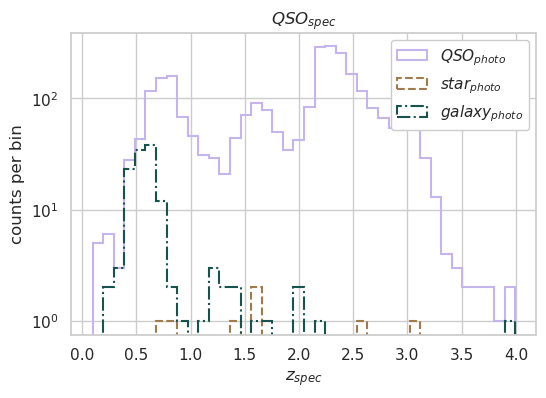

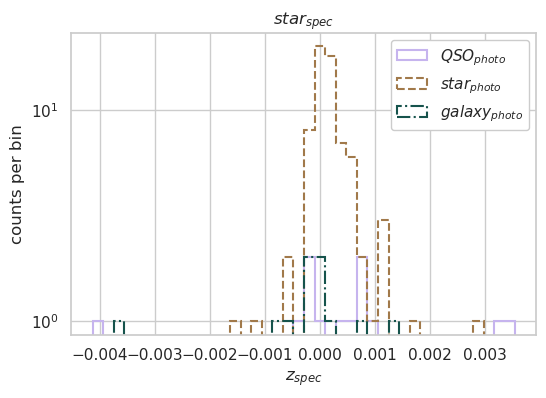

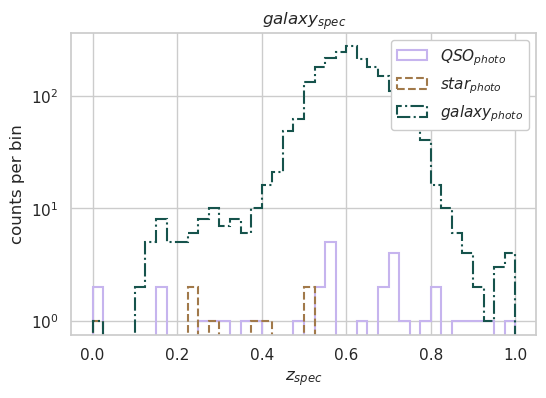

spec. subsets
MSE: 0.29330000281333923
GALAXY: 0.13729999959468842, QSO: 0.30390000343322754, STAR: 3.648699998855591
R2: 0.6556
GALAXY: -9.4201, QSO: 0.5963, STAR: -4129628.4966
rel. error: 0.04010000079870224
GALAXY: 0.007899999618530273, QSO: 0.009499999694526196, STAR: 1.7381000518798828
rel. error std: 0.32749998569488525
GALAXY: 0.2558000087738037, QSO: 0.1632000058889389, STAR: 0.7954000234603882
photo subsets
MSE: 0.29330000281333923
GALAXY: 0.262800008058548, QSO: 0.20640000700950623, STAR: 3.79830002784729
R2: 0.6556
GALAXY: -0.6778, QSO: 0.6881, STAR: -2.62
rel. error: 0.04010000079870224
GALAXY: -0.0044999998062849045, QSO: 0.02759999968111515, STAR: 1.5956000089645386
rel. error std: 0.32749998569488525
GALAXY: 0.24809999763965607, QSO: 0.19990000128746033, STAR: 0.9675999879837036


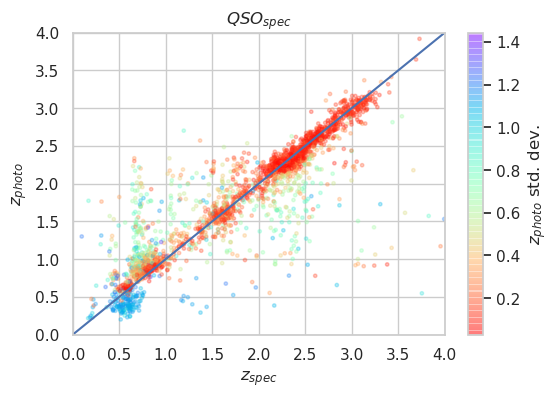

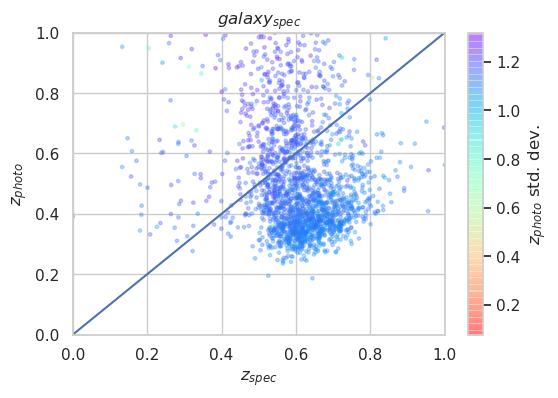

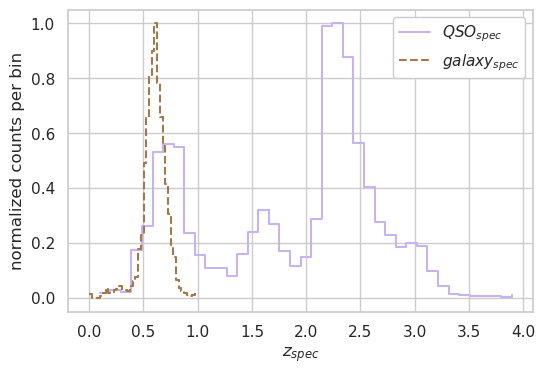

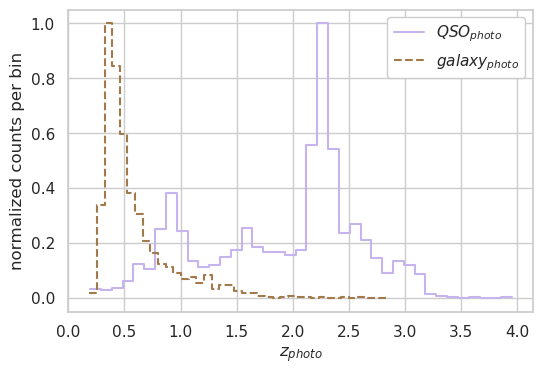

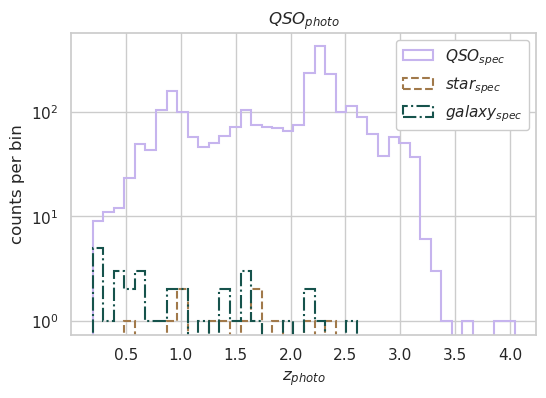

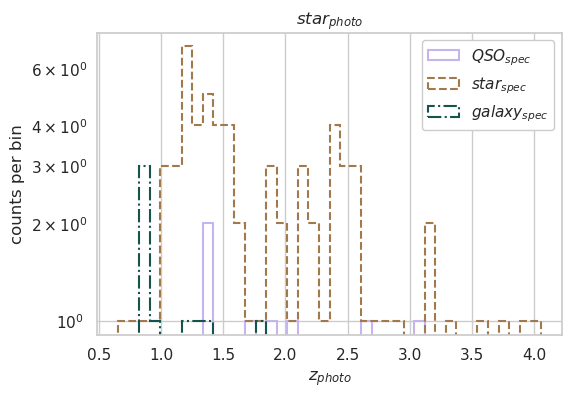

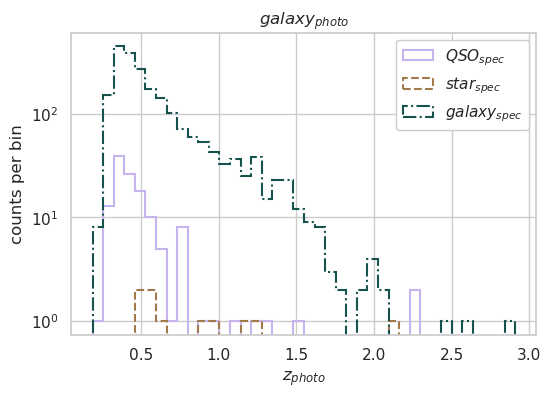

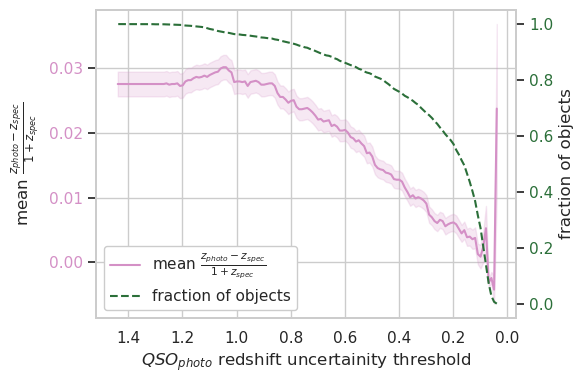

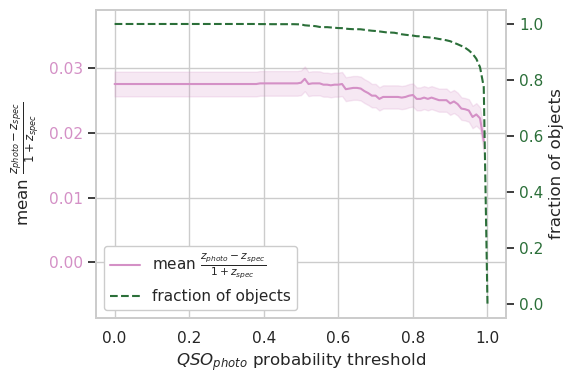

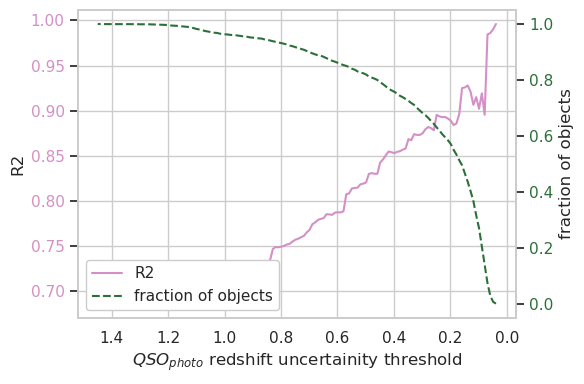

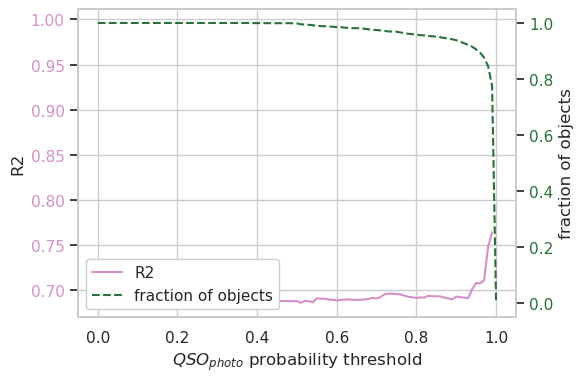

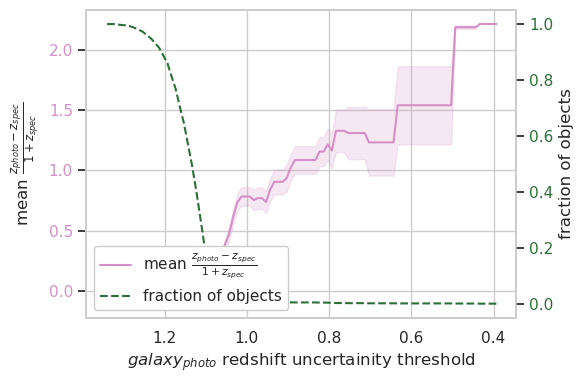

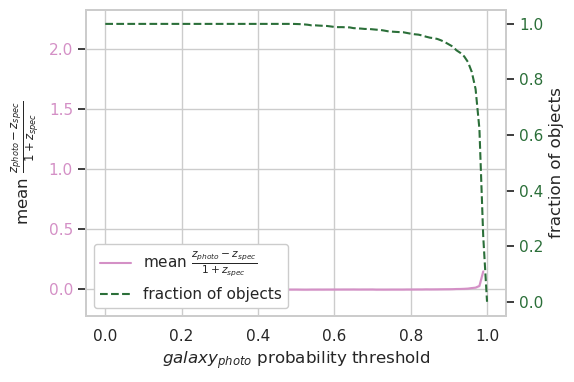

/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/mnt/home/snakoneczny/tools/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/mnt/home/snakoneczny/tools/anaconda3/envs/p

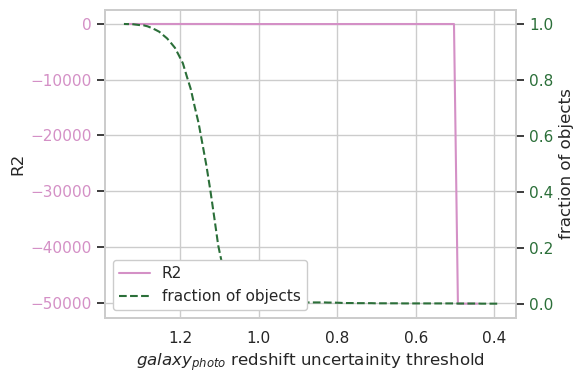

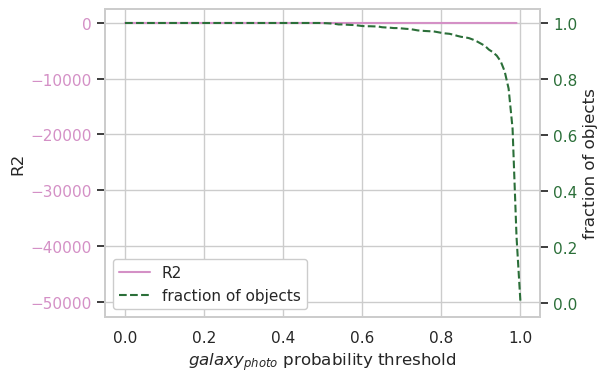

In [55]:
experiment_report(data_train_nakoneczny.loc[data_train_nakoneczny['rmag'] > r_limit], z_max=4)

Number of objects: 46260
Multiclass classification results:
Accuracy = 0.9717
F1 per class = [0.983  0.     0.922  0.9749]
Logloss = 0.7706


<Figure size 600x400 with 0 Axes>

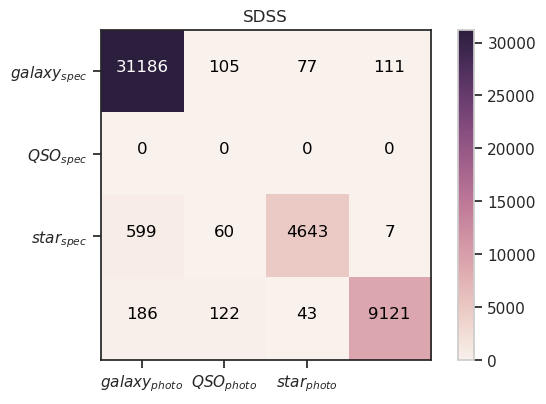

../plotting.py:239: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


<Figure size 600x400 with 0 Axes>

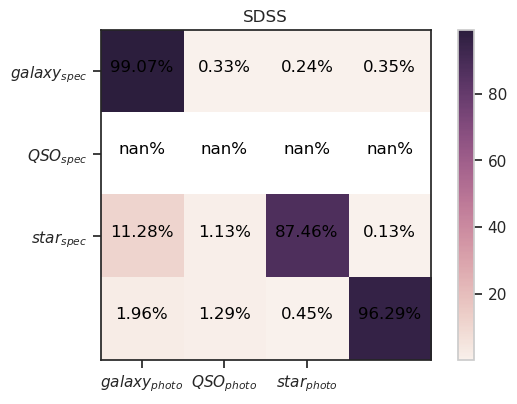

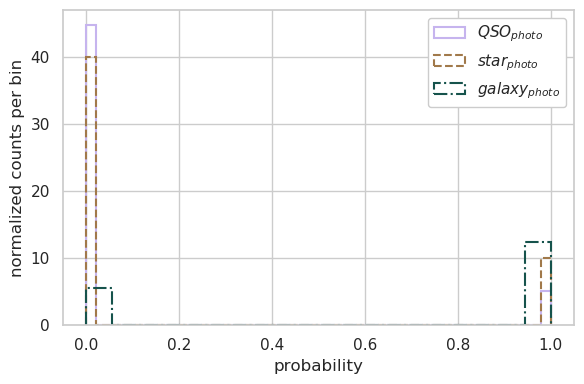

Binary classification results:
Predicted positives: 4763/46260 (10.30%)
Logloss = 0.5868
Accuracy = 0.9830
F1 = 0.9220
Precision = 0.9748
Recall = 0.8746
ROC AUC = 0.9358


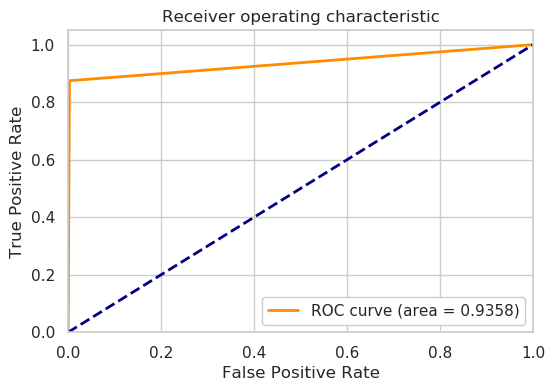

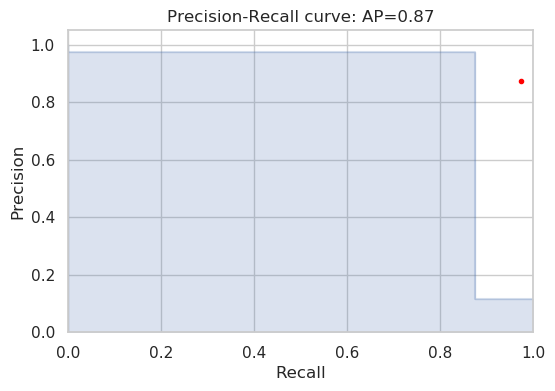

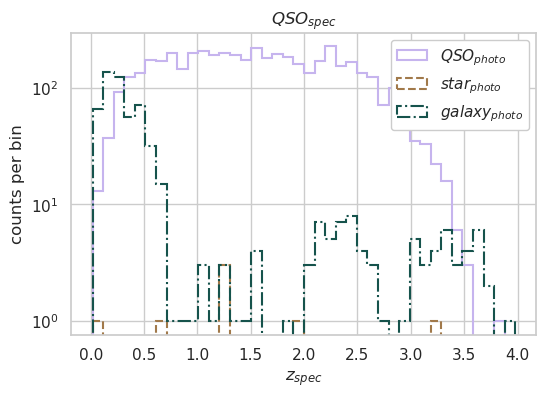

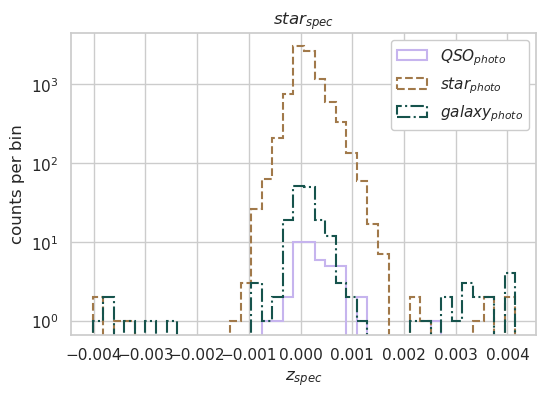

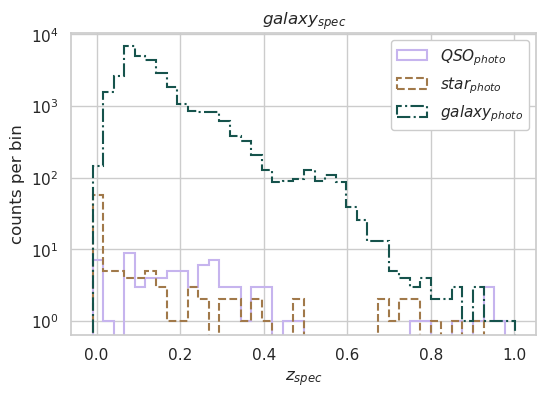

spec. subsets
MSE: 1.736899971961975
GALAXY: 1.592900037765503, QSO: 0.11270000040531158, STAR: 3.125499963760376
R2: -5.2456
GALAXY: -151.8282, QSO: 0.8445, STAR: -23134061.7159
rel. error: 0.9025999903678894
GALAXY: 0.9111999869346619, QSO: 0.041200000792741776, STAR: 1.3566999435424805
rel. error std: 0.7914000153541565
GALAXY: 0.5841000080108643, QSO: 0.17980000376701355, STAR: 1.1332999467849731
photo subsets
MSE: 1.736899971961975
GALAXY: 1.5855000019073486, QSO: 1.6648000478744507, STAR: 0.061799999326467514
R2: -5.2456
GALAXY: -47.0133, QSO: -3.2563, STAR: 0.9018
rel. error: 0.9025999903678894
GALAXY: 0.9038000106811523, QSO: 0.8970999717712402, STAR: 0.025699999183416367
rel. error std: 0.7914000153541565
GALAXY: 0.5911999940872192, QSO: 0.8611000180244446, STAR: 0.14409999549388885


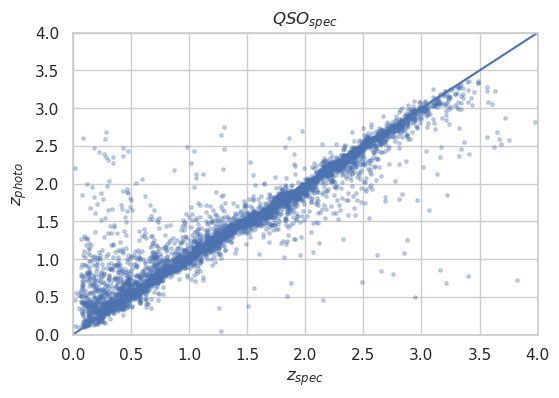

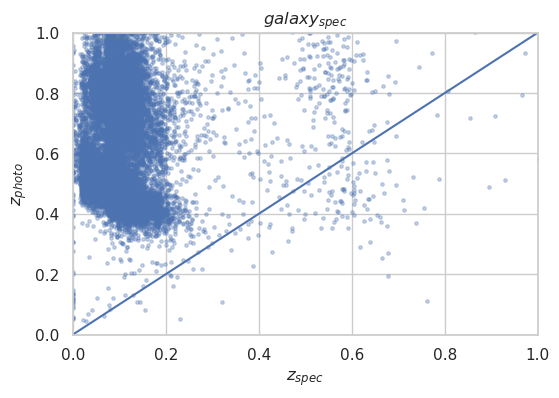

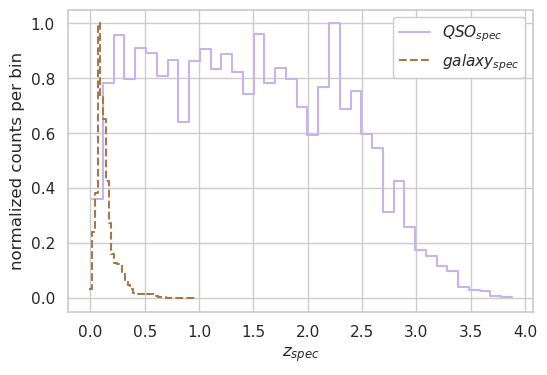

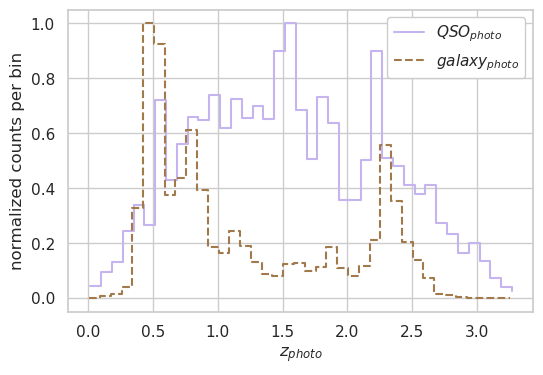

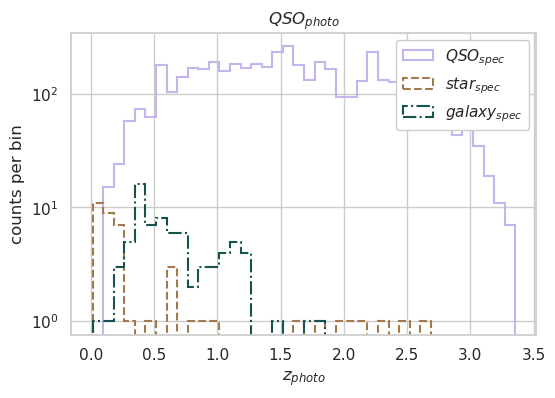

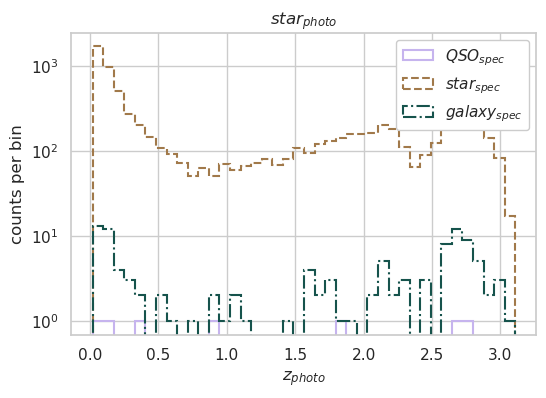

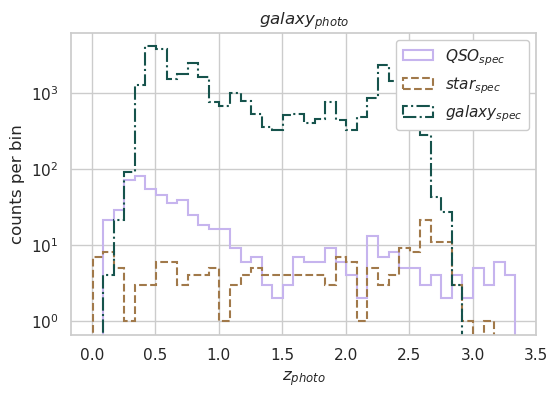

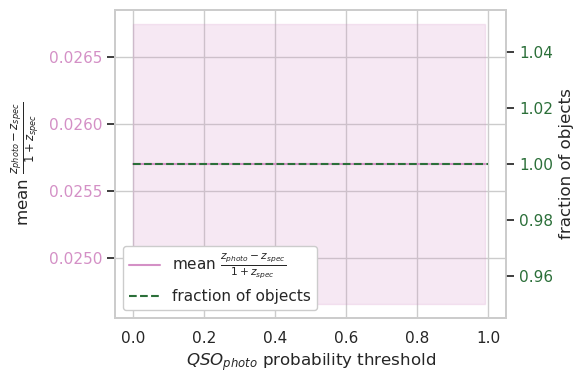

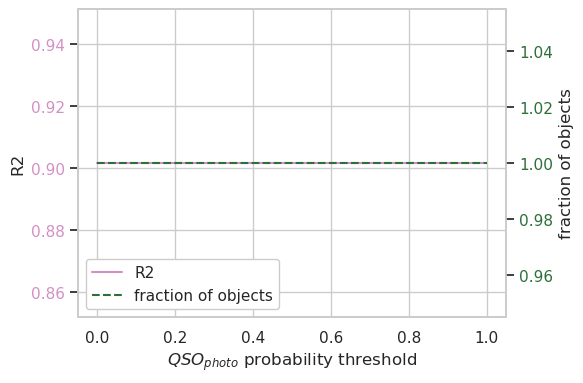

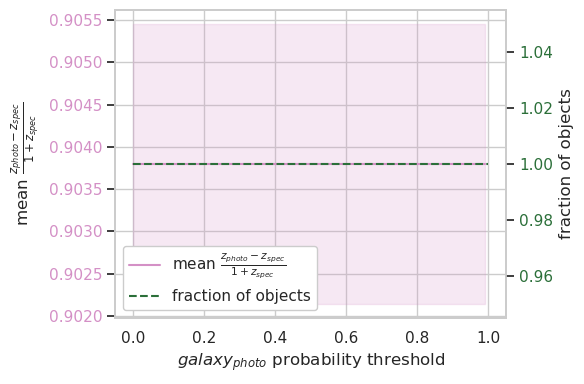

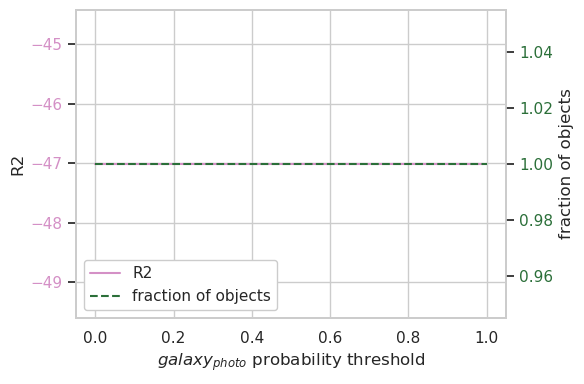

In [56]:
experiment_report(data_train_logan.loc[data_train_logan['rmag'] < r_limit], z_max=4)

Number of objects: 5135
Multiclass classification results:
Accuracy = 0.8812
F1 per class = [0.893  0.     0.8974 0.2752]
Logloss = 3.5429


<Figure size 600x400 with 0 Axes>

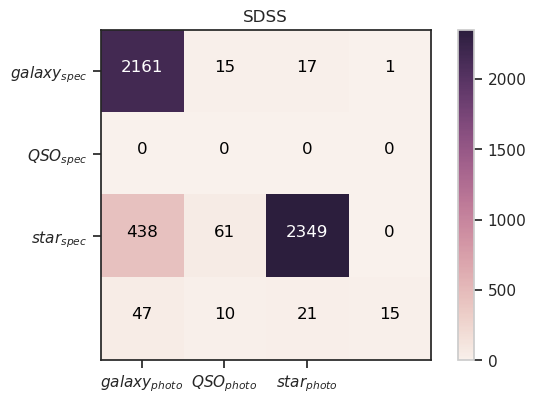

../plotting.py:239: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100


<Figure size 600x400 with 0 Axes>

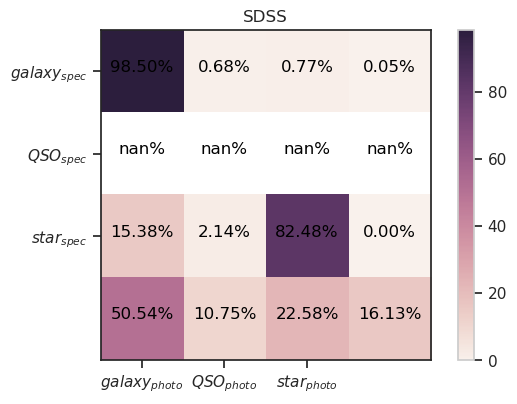

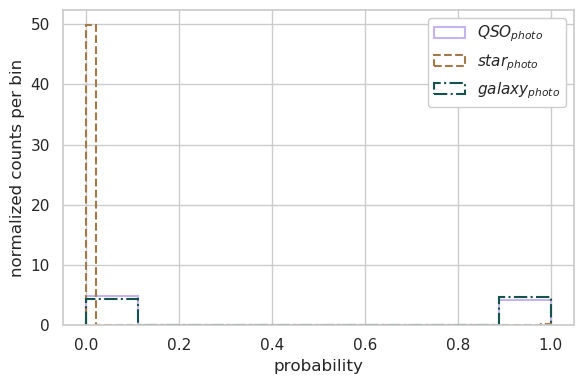

Binary classification results:
Predicted positives: 2387/5135 (46.48%)
Logloss = 3.6119
Accuracy = 0.8954
F1 = 0.8974
Precision = 0.9841
Recall = 0.8248
ROC AUC = 0.9041


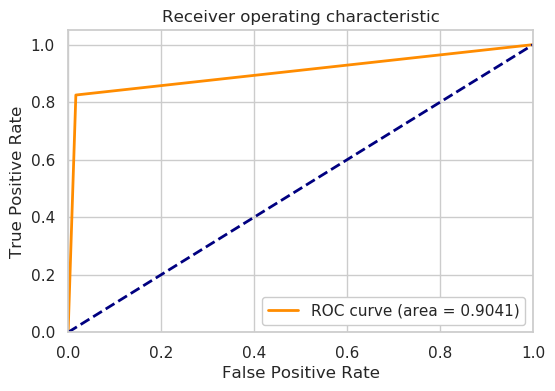

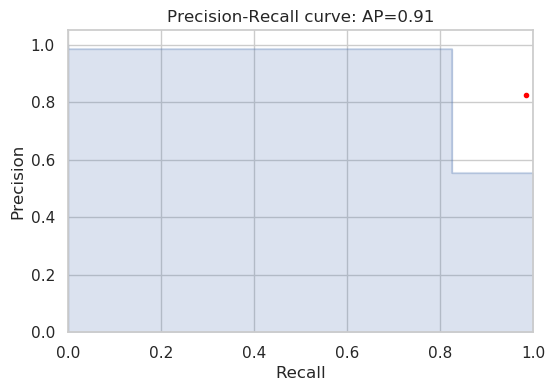

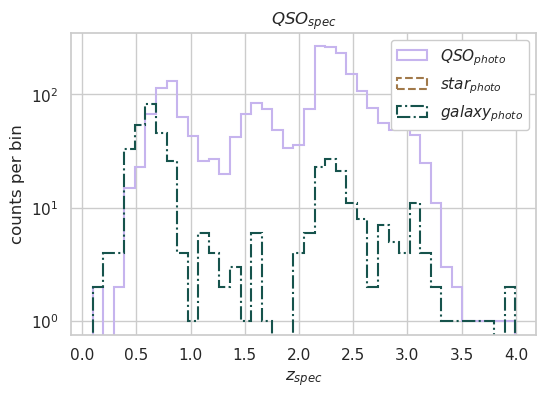

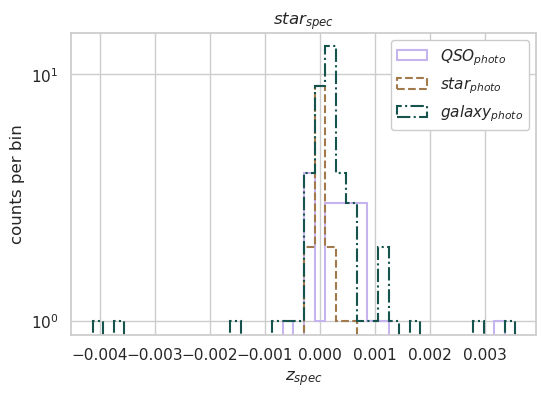

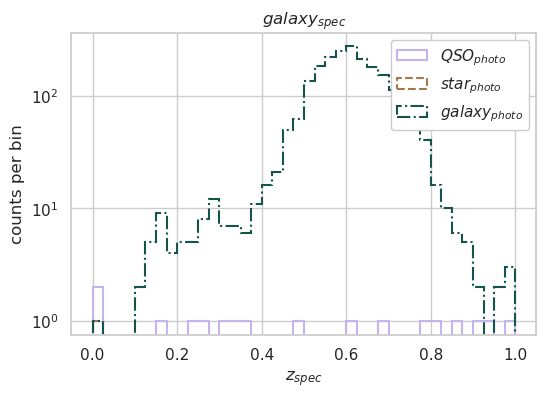

spec. subsets
MSE: 0.527899980545044
GALAXY: 0.713699996471405, QSO: 0.2775999903678894, STAR: 3.8087000846862793
R2: 0.3802
GALAXY: -53.1781, QSO: 0.6312, STAR: -4310619.9281
rel. error: 0.2134000062942505
GALAXY: 0.4138000011444092, QSO: 0.0066999997943639755, STAR: 1.8138999938964844
rel. error std: 0.41999998688697815
GALAXY: 0.3806999921798706, QSO: 0.17949999868869781, STAR: 0.7228999733924866
photo subsets
MSE: 0.527899980545044
GALAXY: 0.8363000154495239, QSO: 1.638800024986267, STAR: 0.11289999634027481
R2: 0.3802
GALAXY: -1.1917, QSO: -0.1877, STAR: 0.8064
rel. error: 0.2134000062942505
GALAXY: 0.38659998774528503, QSO: 0.32510000467300415, STAR: 0.0034000000450760126
rel. error std: 0.41999998688697815
GALAXY: 0.4505999982357025, QSO: 0.7491999864578247, STAR: 0.16220000386238098


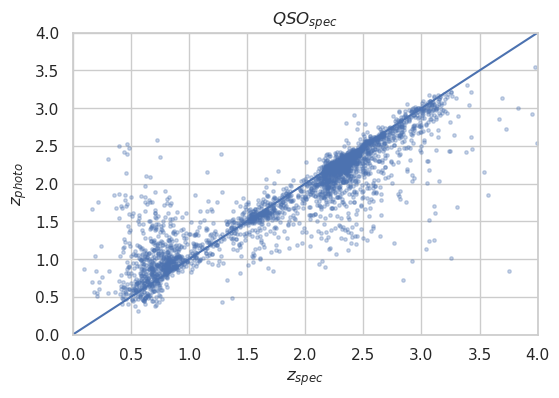

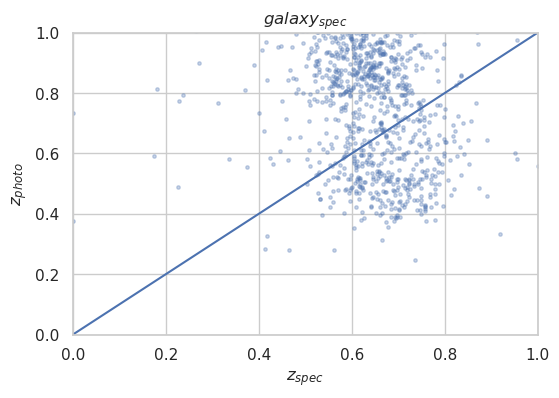

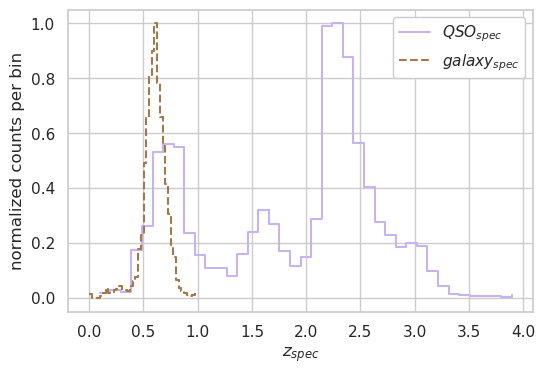

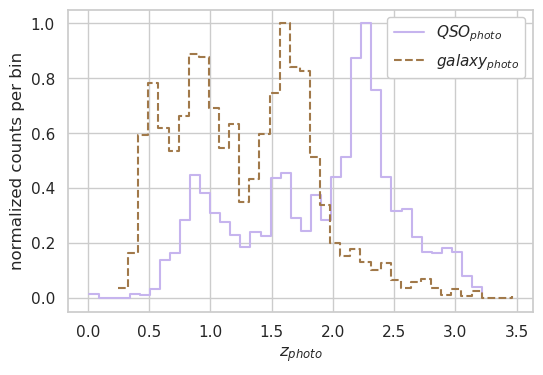

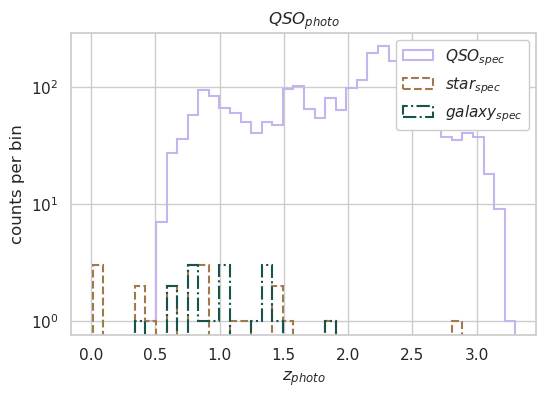

../evaluation.py:312: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


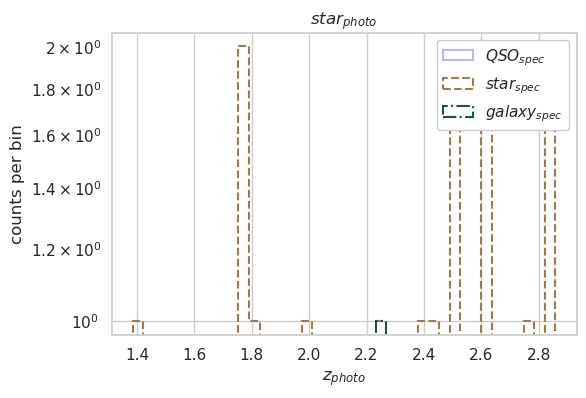

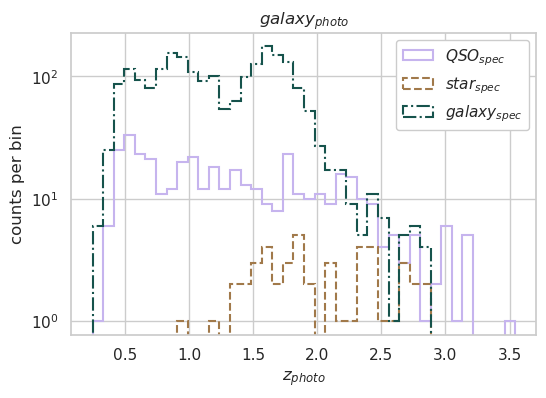

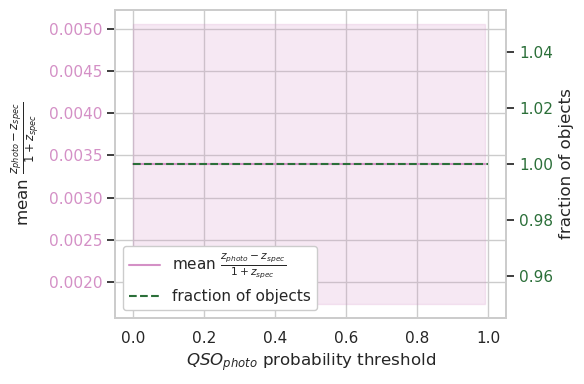

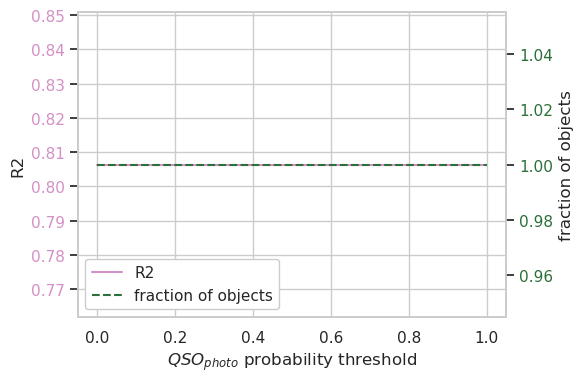

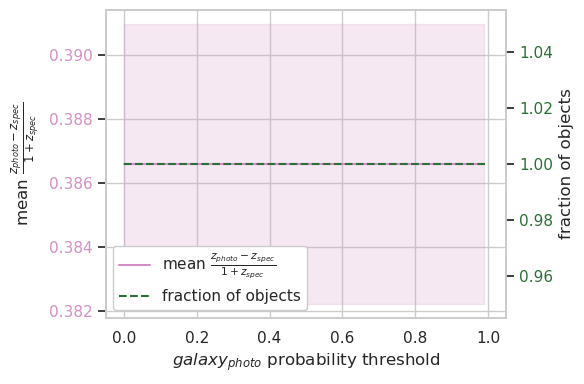

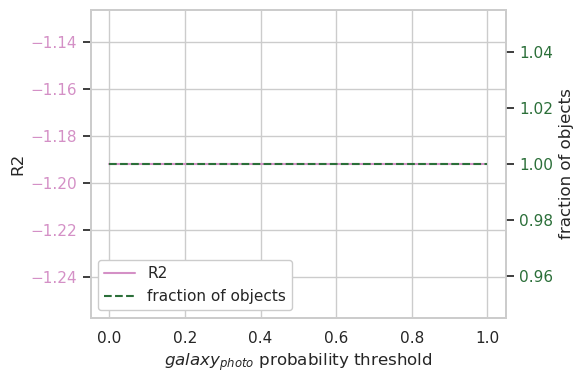

In [57]:
experiment_report(data_train_logan.loc[data_train_logan['rmag'] > r_limit], z_max=4)

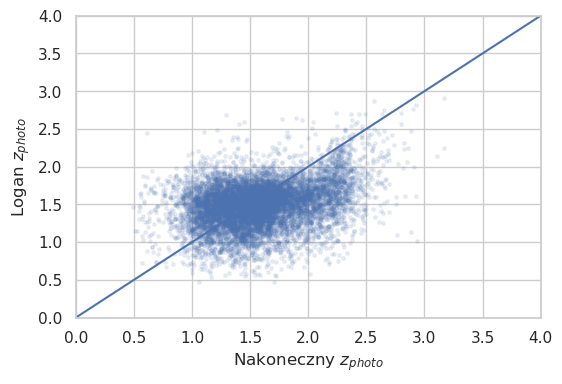

In [38]:
z_max=4
color_column = 'QSO_Z_PHOTO_STDDEV'
size = 6

f, ax = plt.subplots()
colors = data[color_column]
points = ax.scatter(tmp['QSO_Z_PHOTO'], tmp['zPredQ'], alpha=0.1, s=size)  # , cmap='rainbow_r', c=colors
plt.plot(range(z_max + 1))

ax.set(xlim=(0, z_max), ylim=(0, z_max))
plt.xlabel(r'Nakoneczny $z_{photo}$')
plt.ylabel(r'Logan $z_{photo}$')
# plt.title(get_plot_text(title))

# cb = f.colorbar(points)
# cb.set_label(get_plot_text(color_column))

plt.show()